### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import Dataframe

In [4]:
df = pd.read_csv('train.csv')

### Exploratory Data Analysis

In [6]:
df.head(10)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
5,5,Male,18.128249,1.748524,51.552595,yes,yes,2.919751,3.000000,Sometimes,no,2.137550,no,1.930033,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
6,6,Male,29.883021,1.754711,112.725005,yes,yes,1.991240,3.000000,Sometimes,no,2.000000,no,0.000000,0.696948,Sometimes,Automobile,Obesity_Type_II
7,7,Male,29.891473,1.750150,118.206565,yes,yes,1.397468,3.000000,Sometimes,no,2.000000,no,0.598655,0.000000,Sometimes,Automobile,Obesity_Type_II
8,8,Male,17.000000,1.700000,70.000000,no,yes,2.000000,3.000000,Sometimes,no,3.000000,yes,1.000000,1.000000,no,Public_Transportation,Overweight_Level_I
9,9,Female,26.000000,1.638836,111.275646,yes,yes,3.000000,3.000000,Sometimes,no,2.632253,no,0.000000,0.218645,Sometimes,Public_Transportation,Obesity_Type_III


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

#### One Hot Encoding

In [9]:
df = pd.get_dummies(df, columns=['Gender'], prefix='Gender', dtype='uint8')
df = pd.get_dummies(df, columns=['family_history_with_overweight'], prefix='Line_of_Overweights', dtype='uint8')
df = pd.get_dummies(df, columns=['FAVC'], prefix='FAVC', dtype='uint8')
df = pd.get_dummies(df, columns=['SMOKE'], prefix='SMOKES', dtype='uint8')
df = pd.get_dummies(df, columns=['SCC'], prefix='SCC', dtype='uint8')

In [10]:
df.head()

,id,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,...,Gender_Female,Gender_Male,Line_of_Overweights_no,Line_of_Overweights_yes,FAVC_no,FAVC_yes,SMOKES_no,SMOKES_yes,SCC_no,SCC_yes
0,0,24.443011,1.699998,81.669950,2.000000,2.983297,Sometimes,2.763573,0.000000,0.976473,...,0,1,0,1,0,1,1,0,1,0
1,1,18.000000,1.560000,57.000000,2.000000,3.000000,Frequently,2.000000,1.000000,1.000000,...,1,0,0,1,0,1,1,0,1,0
2,2,18.000000,1.711460,50.165754,1.880534,1.411685,Sometimes,1.910378,0.866045,1.673584,...,1,0,0,1,0,1,1,0,1,0
3,3,20.952737,1.710730,131.274851,3.000000,3.000000,Sometimes,1.674061,1.467863,0.780199,...,1,0,0,1,0,1,1,0,1,0
4,4,31.641081,1.914186,93.798055,2.679664,1.971472,Sometimes,1.979848,1.967973,0.931721,...,0,1,0,1,0,1,1,0,1,0


In [11]:
df = df.drop(columns = ['Gender_Male', 'Line_of_Overweights_no', 'FAVC_yes' ,'SMOKES_no', 'SCC_no'])

In [12]:
df.head()

,id,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,MTRANS,NObeyesdad,Gender_Female,Line_of_Overweights_yes,FAVC_no,SMOKES_yes,SCC_yes
0,0,24.443011,1.699998,81.669950,2.000000,2.983297,Sometimes,2.763573,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,0,1,0,0,0
1,1,18.000000,1.560000,57.000000,2.000000,3.000000,Frequently,2.000000,1.000000,1.000000,no,Automobile,Normal_Weight,1,1,0,0,0
2,2,18.000000,1.711460,50.165754,1.880534,1.411685,Sometimes,1.910378,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,1,1,0,0,0
3,3,20.952737,1.710730,131.274851,3.000000,3.000000,Sometimes,1.674061,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,1,1,0,0,0
4,4,31.641081,1.914186,93.798055,2.679664,1.971472,Sometimes,1.979848,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,0,1,0,0,0


#### Label Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()

In [16]:
le.fit(df['CALC'])
df['Alc_Consumption'] = le.transform(df['CALC'])

In [17]:
le.fit(df['MTRANS'])
df['Mode_of_Transport'] = le.transform(df['MTRANS'])

In [18]:
le.fit(df['CAEC'])
df['Nibbling'] = le.transform(df['CAEC'])

In [19]:
le.fit(df['NObeyesdad'])
df['Health_Levels'] = le.transform(df['NObeyesdad'])

In [20]:
df = df.drop(columns = ['CALC', 'MTRANS', 'CAEC', 'NObeyesdad'])

In [21]:
df.head()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Line_of_Overweights_yes,FAVC_no,SMOKES_yes,SCC_yes,Alc_Consumption,Mode_of_Transport,Nibbling,Health_Levels
0,0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,0,1,0,0,0,1,3,2,6
1,1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,1,1,0,0,0,2,0,1,1
2,2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,1,1,0,0,0,2,3,2,0
3,3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,1,1,0,0,0,1,3,2,4
4,4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,0,1,0,0,0,1,3,2,6


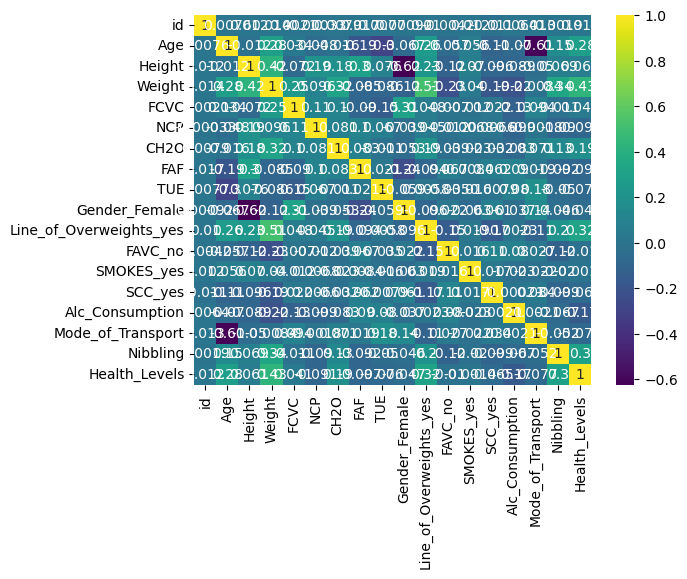

<Figure size 2000x800 with 0 Axes>

In [22]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.figure(figsize = (20,8))
plt.show()

#### Rename Columns

In [24]:
df = df.rename(columns = {'NCP':'Number_of_Meals'})
df = df.rename(columns = {'FCVC':'Vegetable_consumption_frequency'})
df = df.rename(columns = {'CH2O':'Water_Consumption'})
df = df.rename(columns = {'FAF':'Exercise_Frequency'})
df = df.rename(columns = {'TUE':'Screen_Time'})

In [25]:
df.head()

,id,Age,Height,Weight,Vegetable_consumption_frequency,Number_of_Meals,Water_Consumption,Exercise_Frequency,Screen_Time,Gender_Female,Line_of_Overweights_yes,FAVC_no,SMOKES_yes,SCC_yes,Alc_Consumption,Mode_of_Transport,Nibbling,Health_Levels
0,0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,0,1,0,0,0,1,3,2,6
1,1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,1,1,0,0,0,2,0,1,1
2,2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,1,1,0,0,0,2,3,2,0
3,3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,1,1,0,0,0,1,3,2,4
4,4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,0,1,0,0,0,1,3,2,6


#### Graphical Analysis

In [27]:
features = [col for col in df.columns if col not in ['id', 'Health_Levels']]

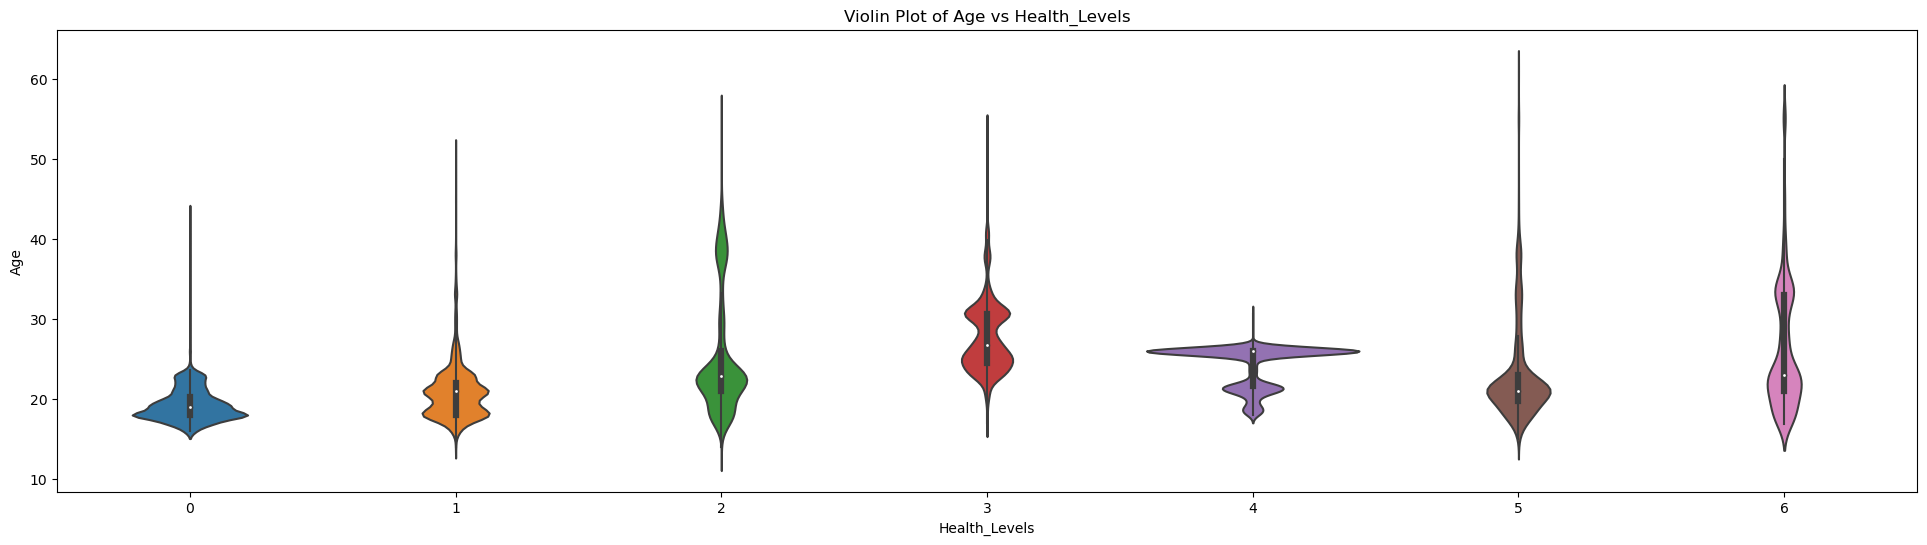

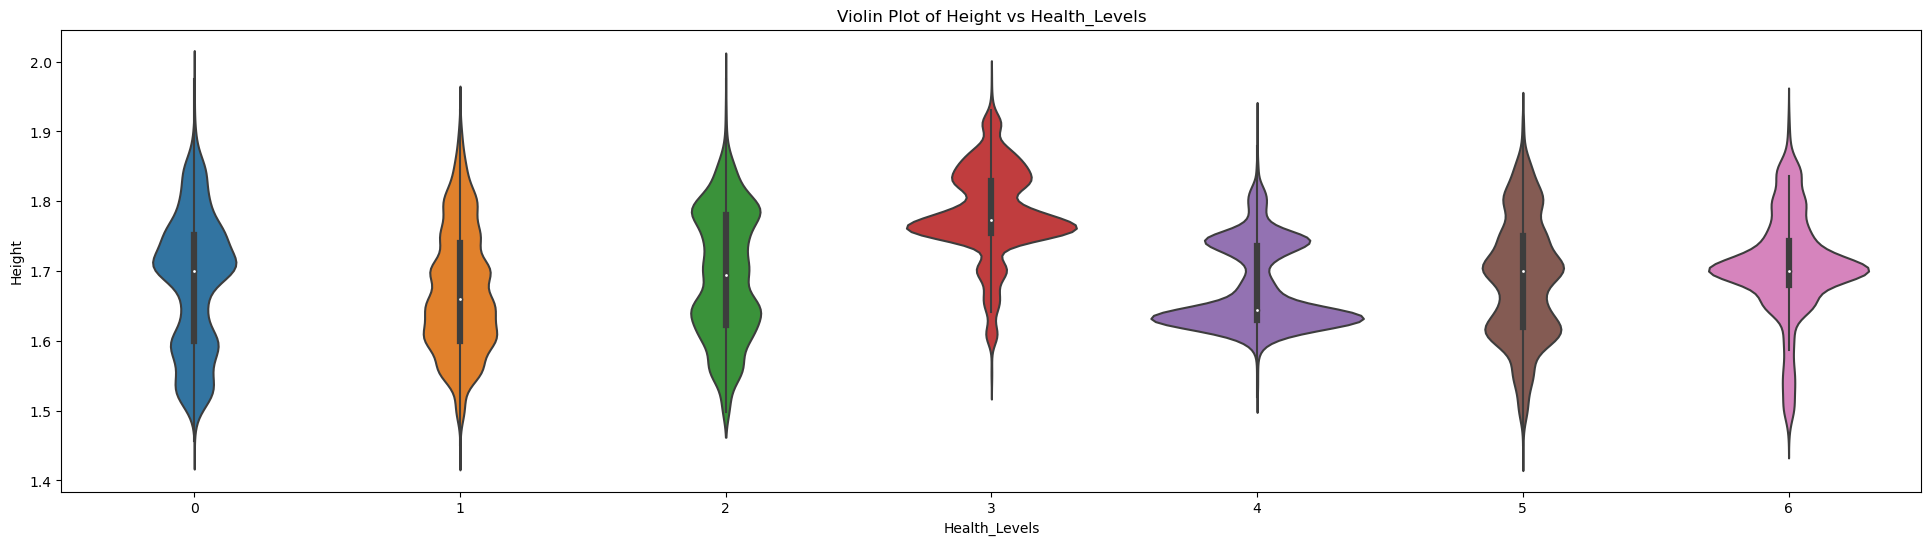

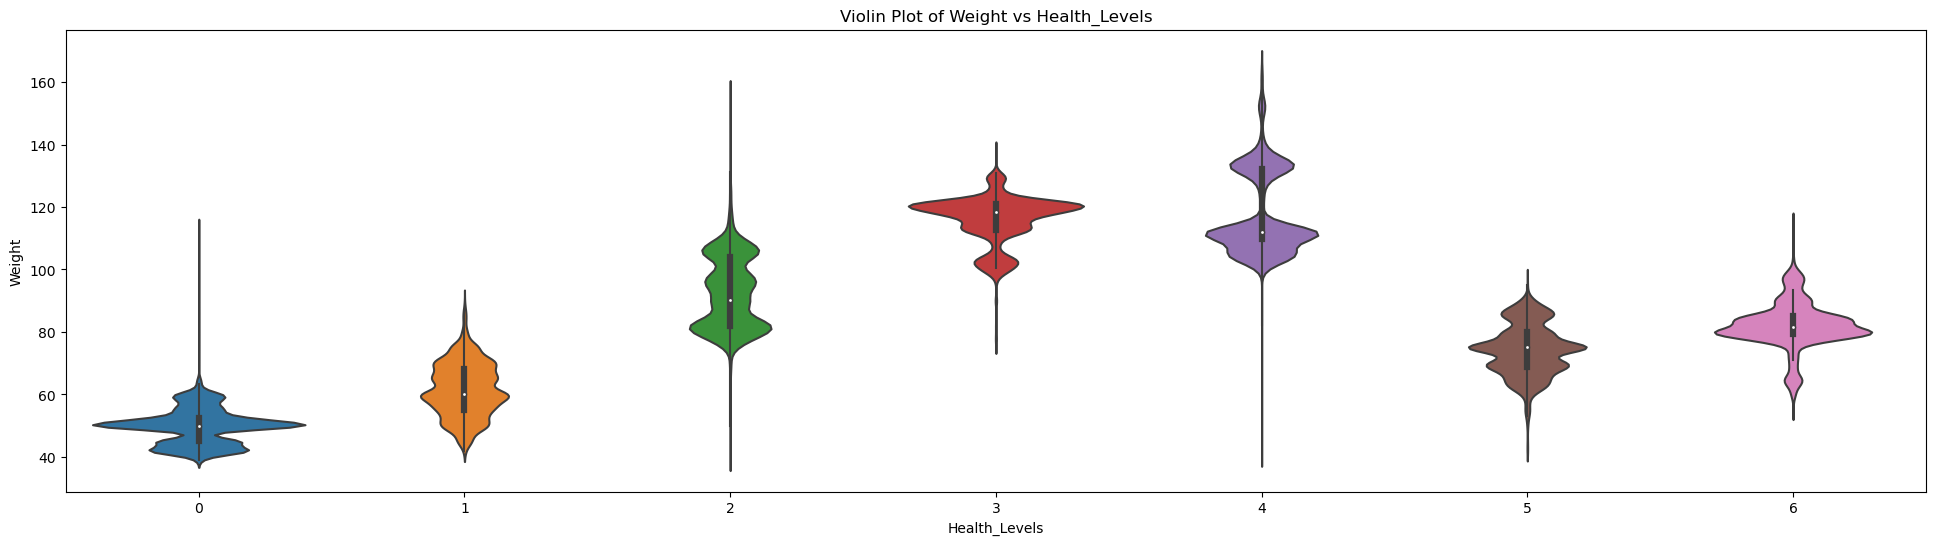

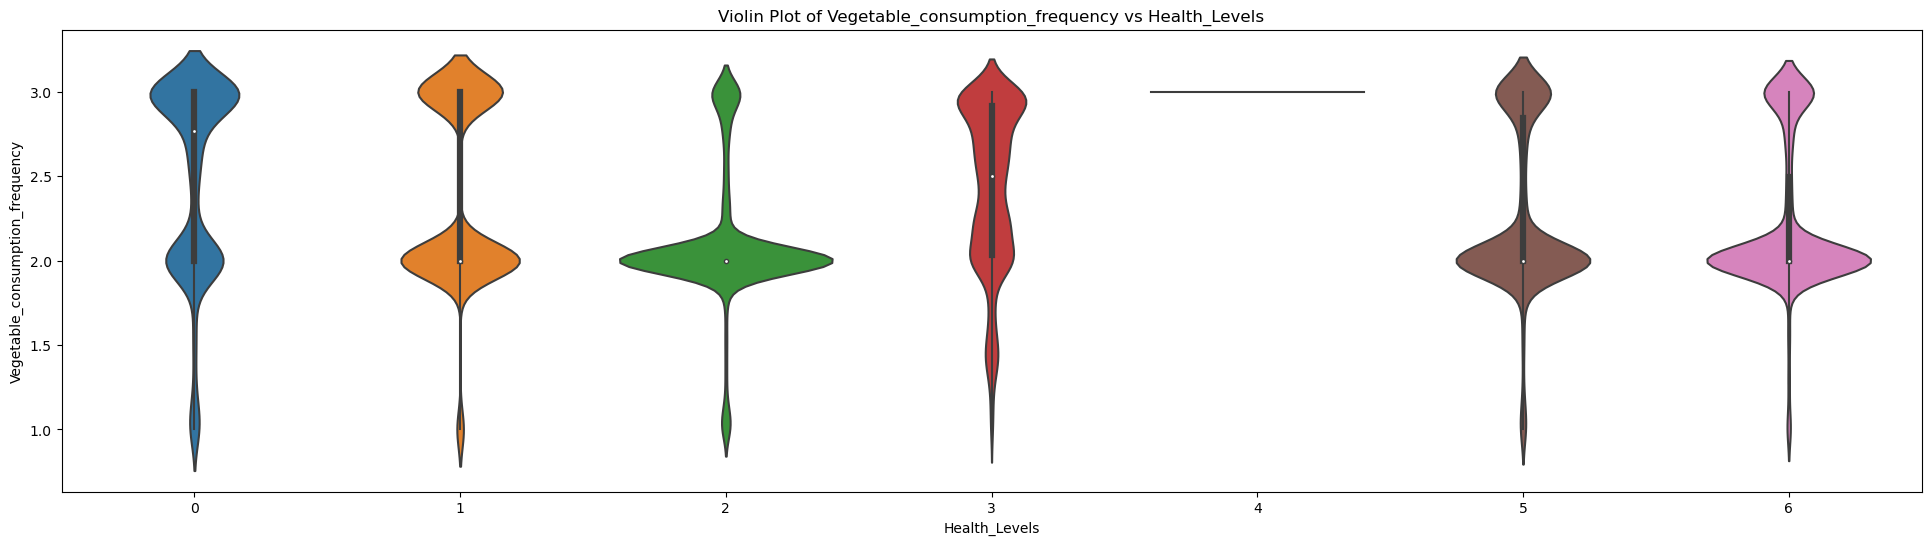

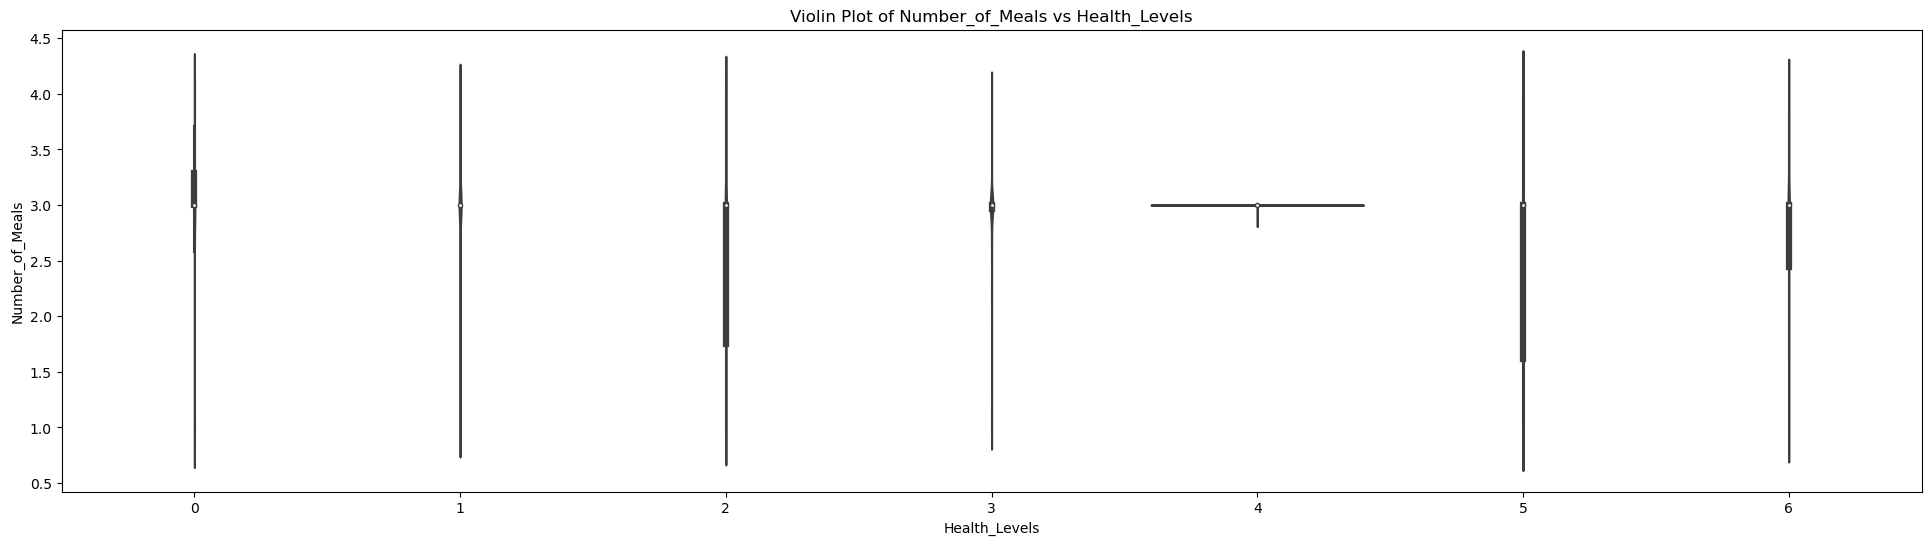

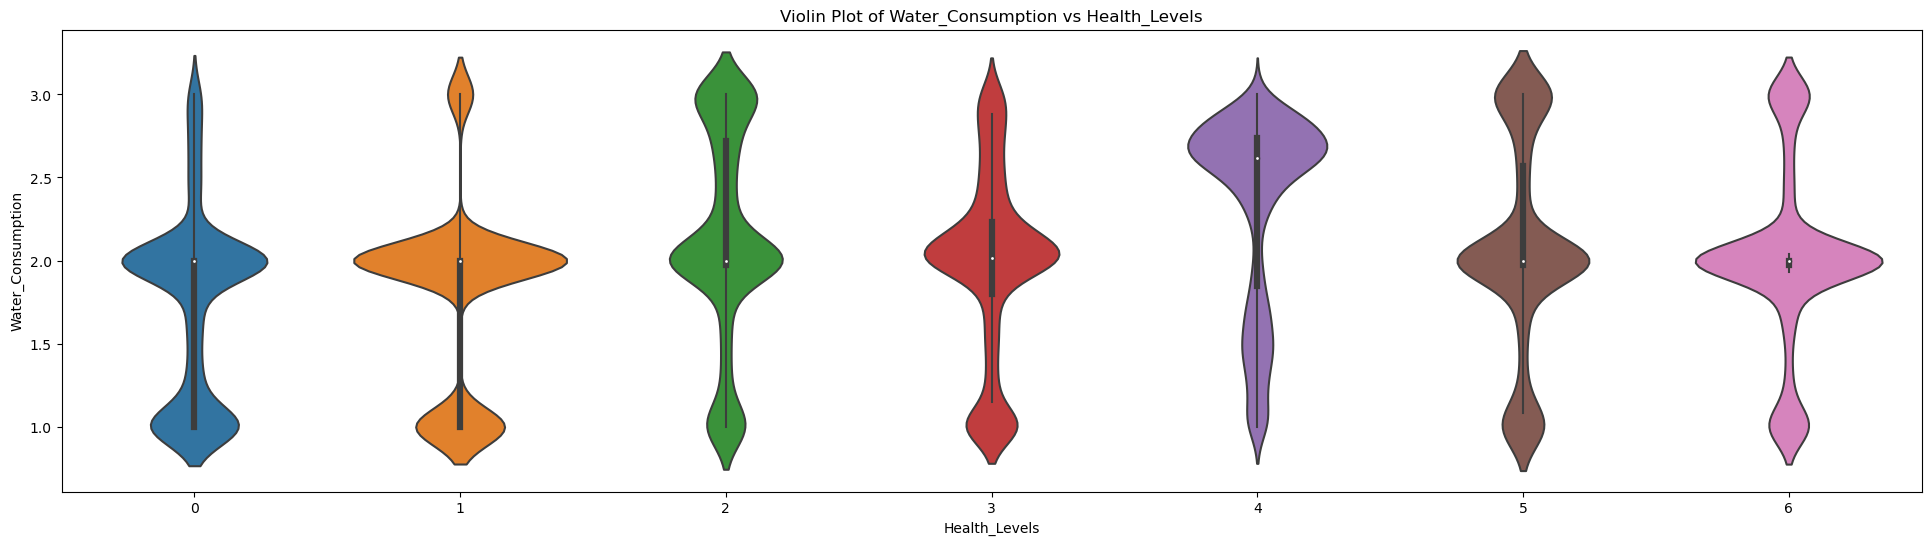

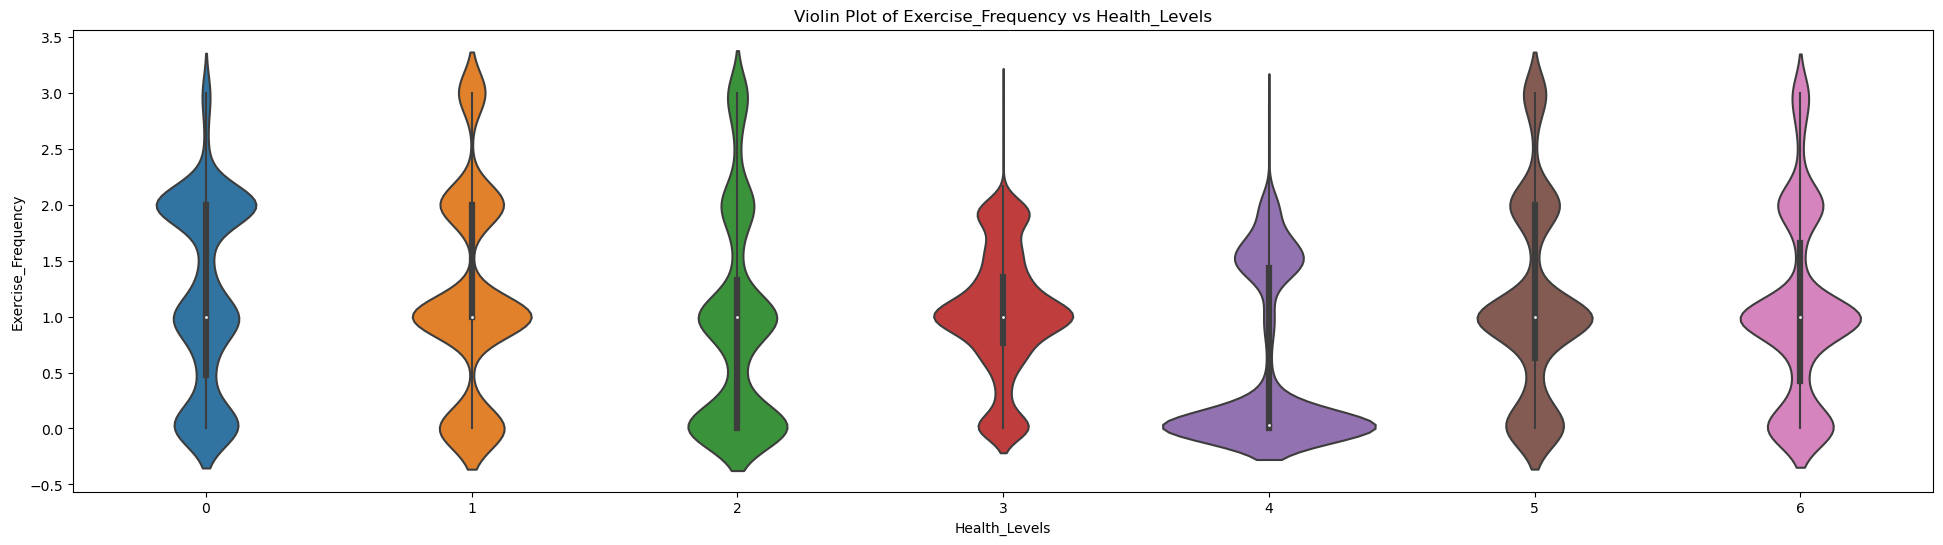

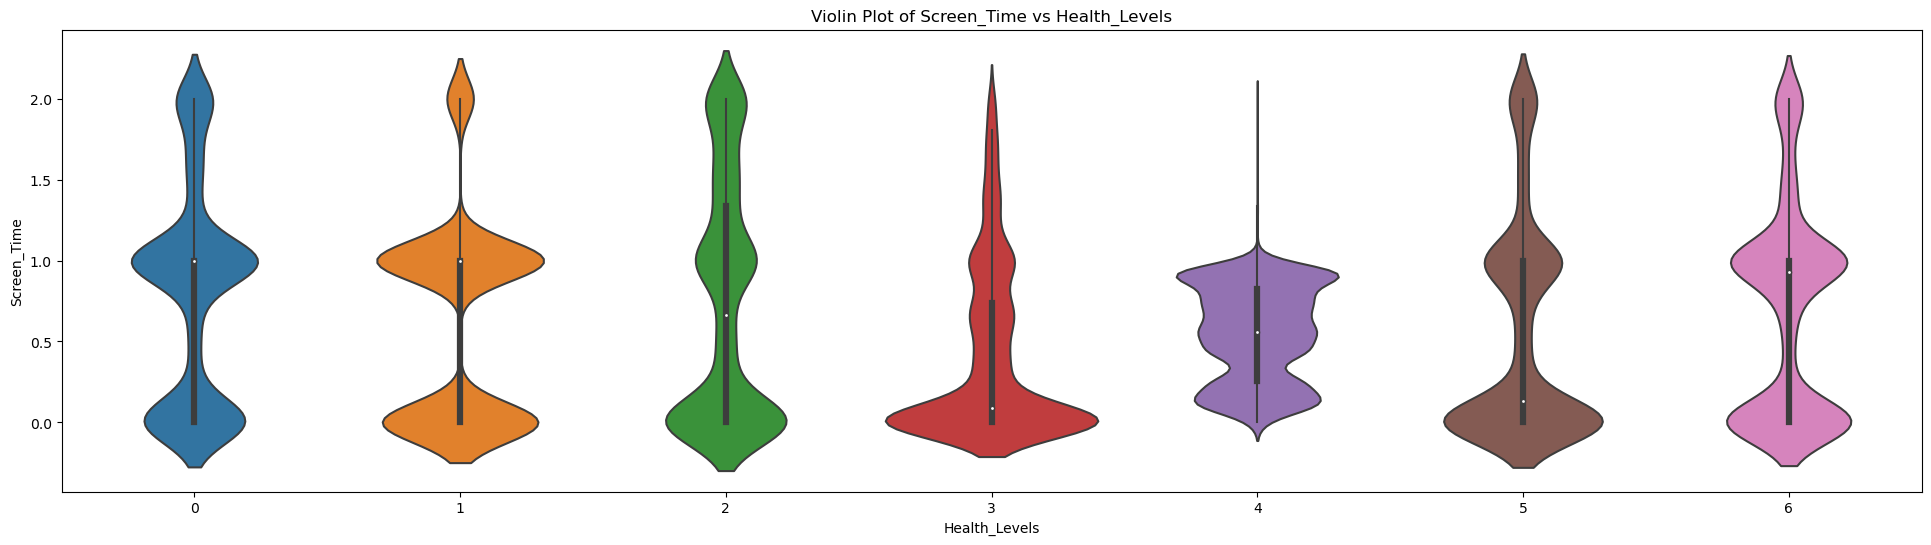

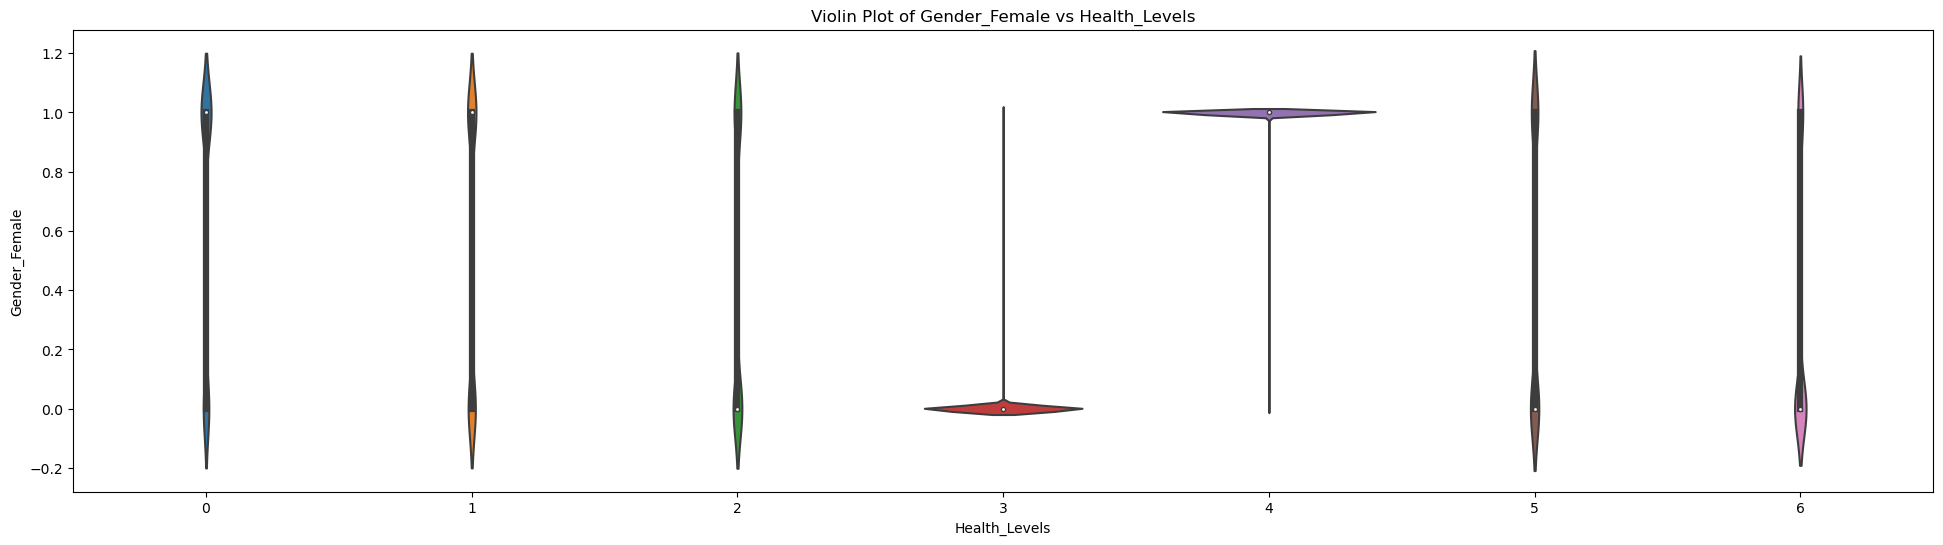

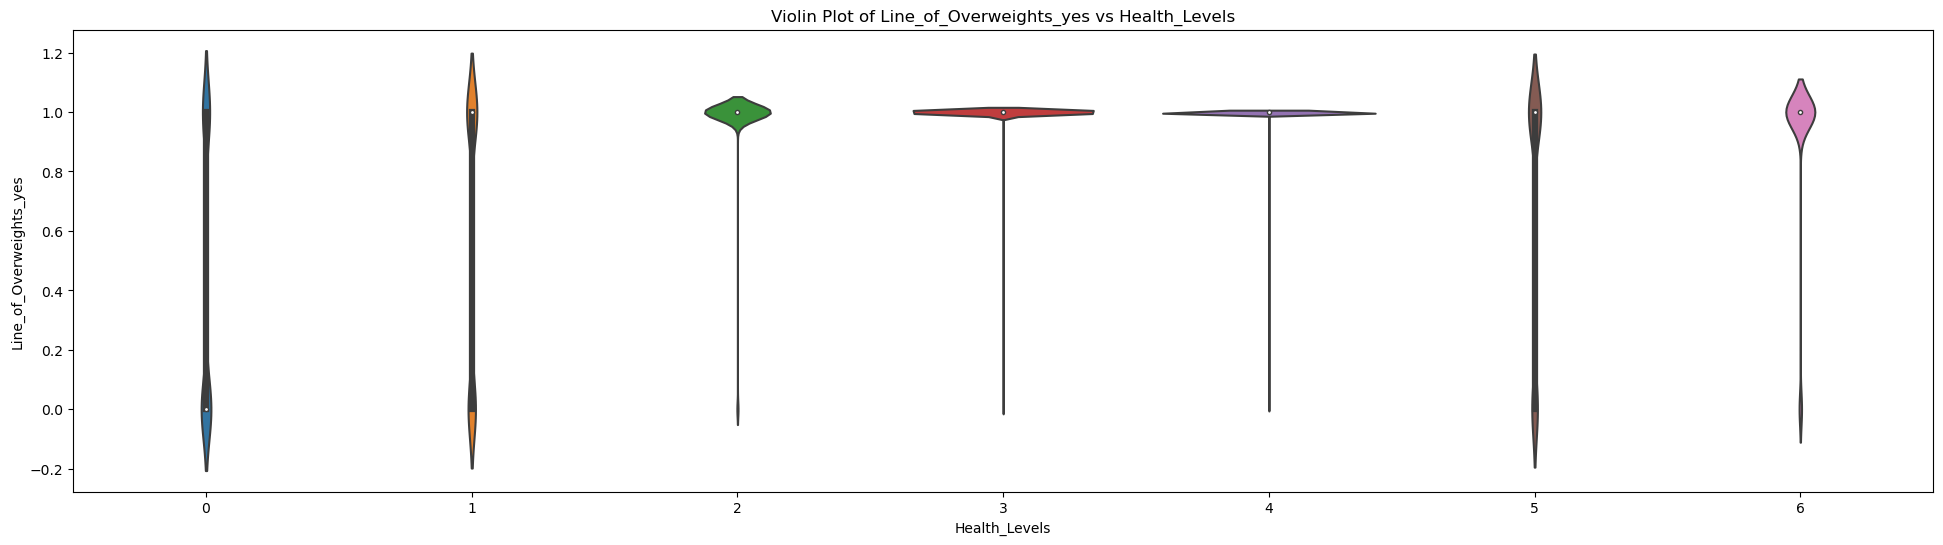

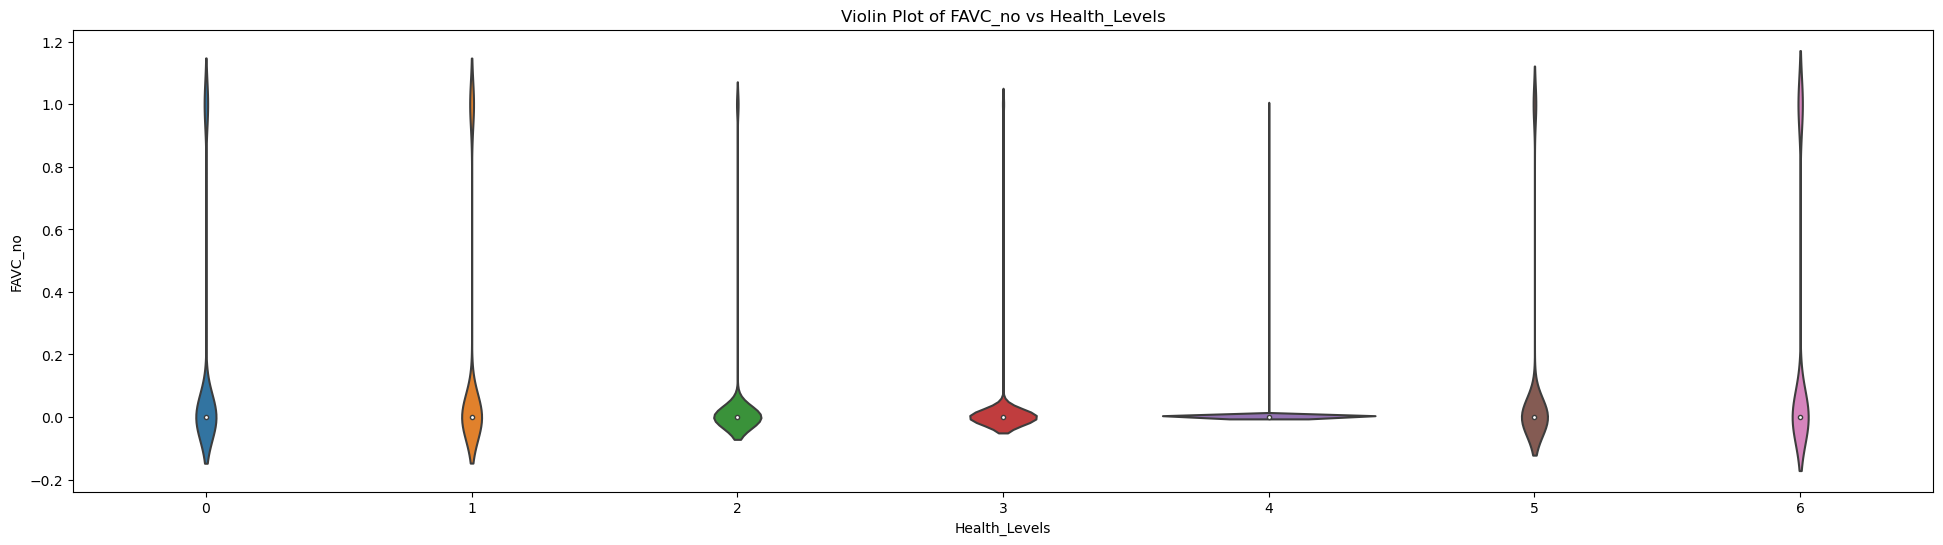

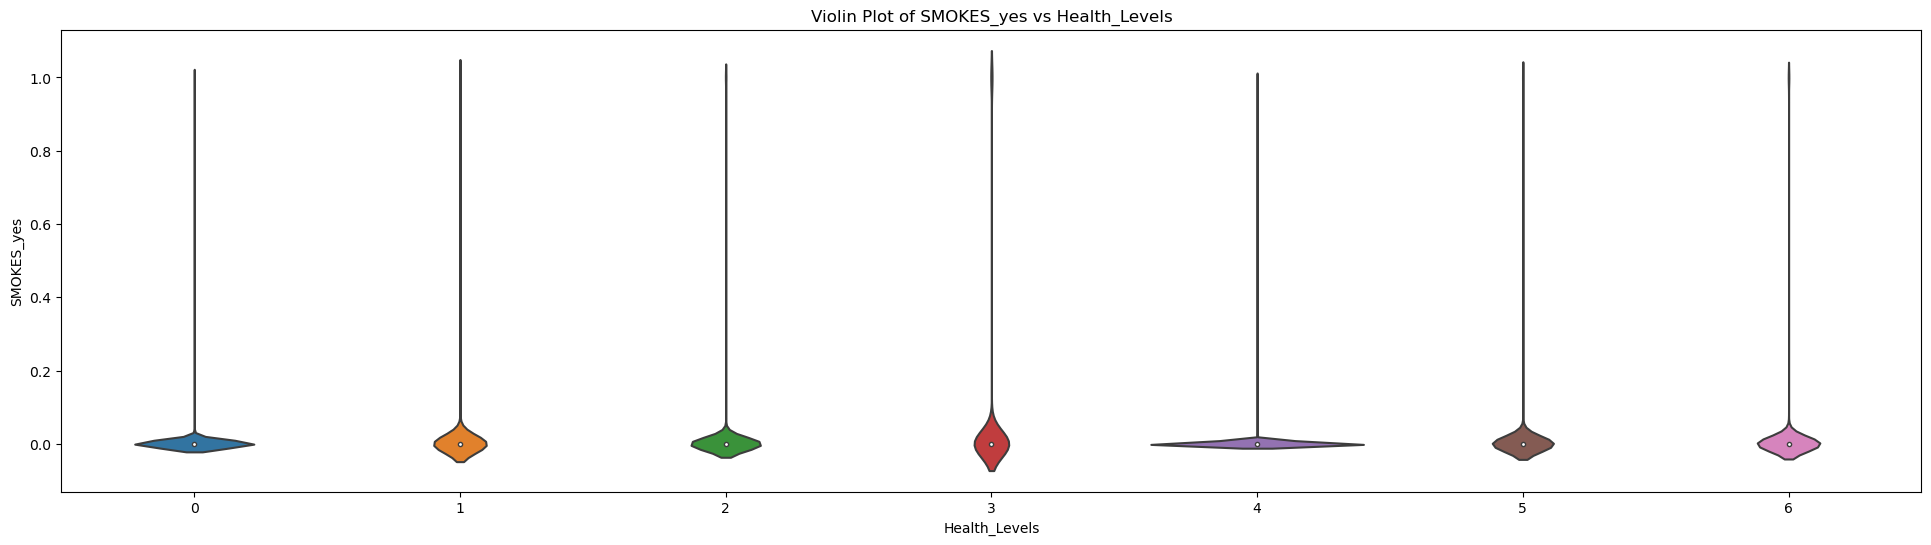

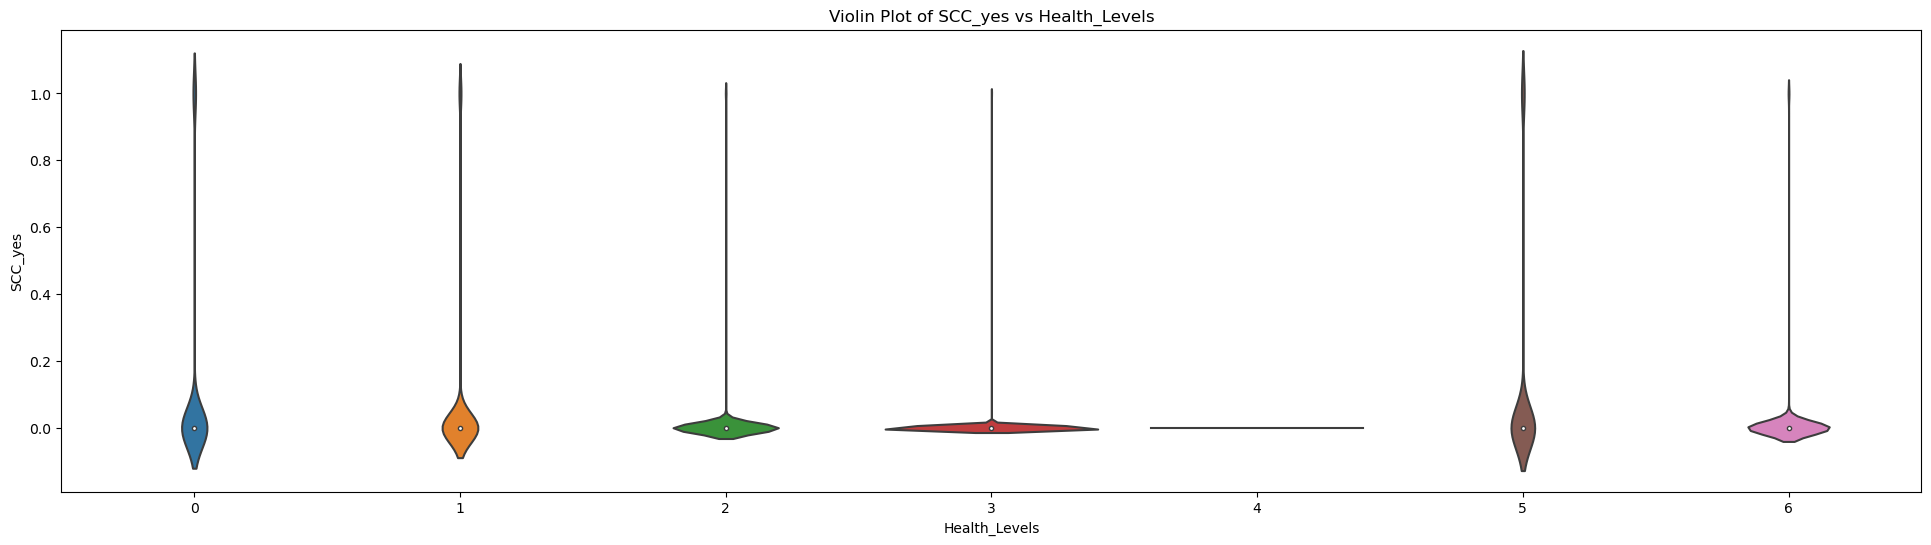

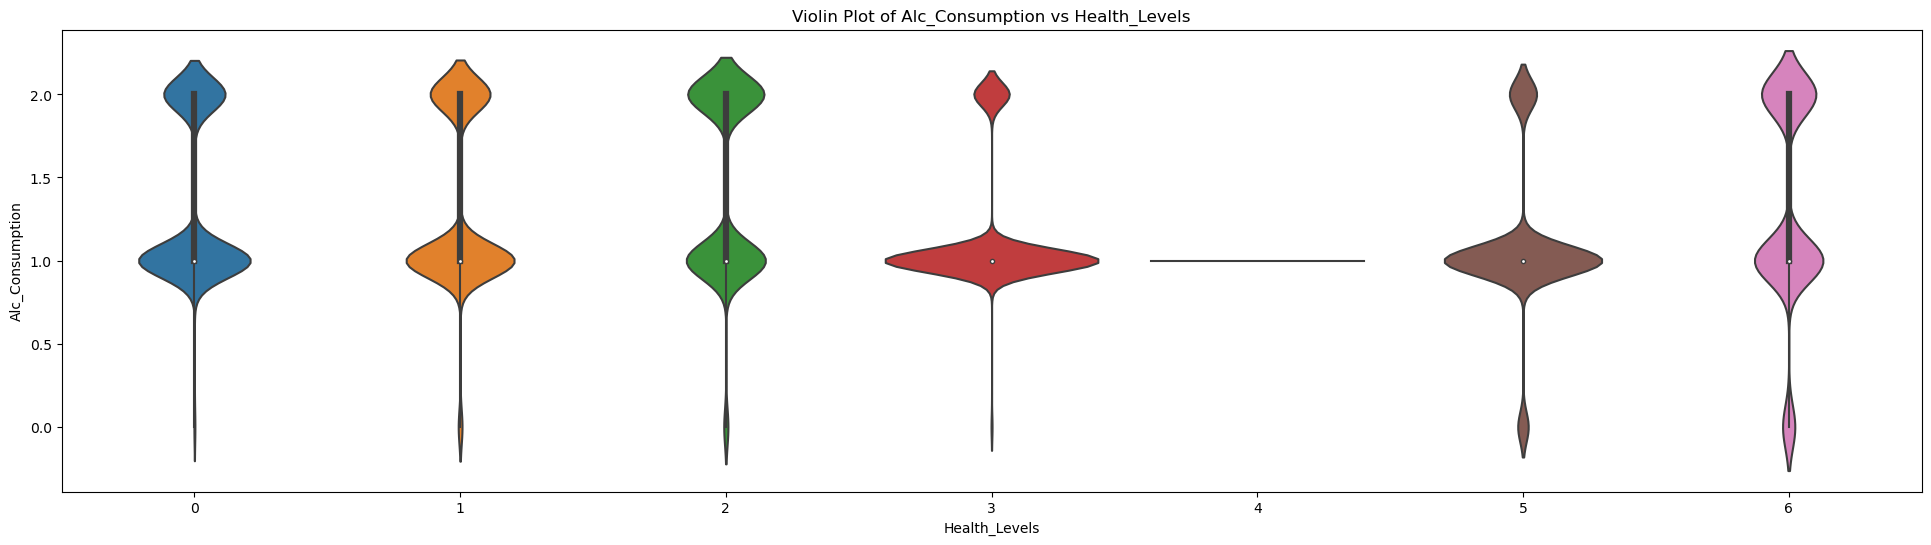

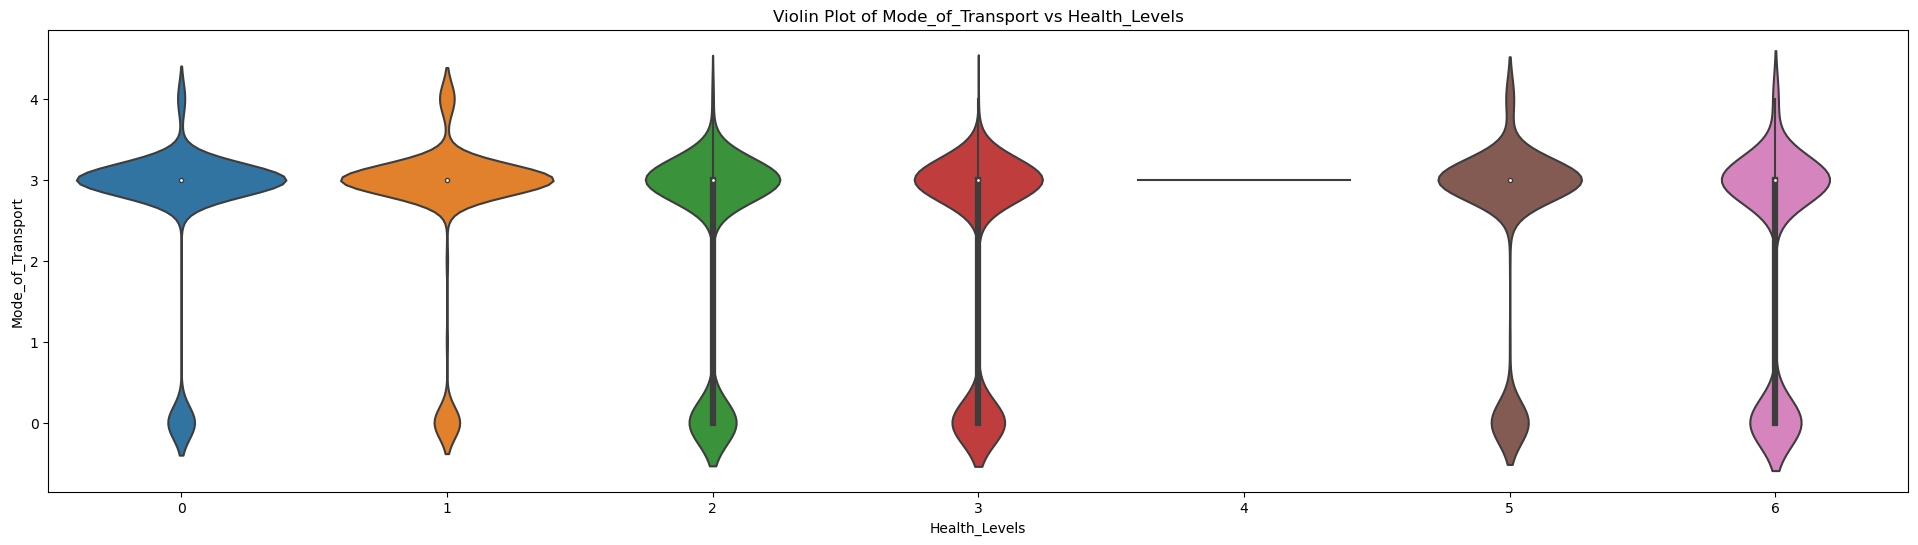

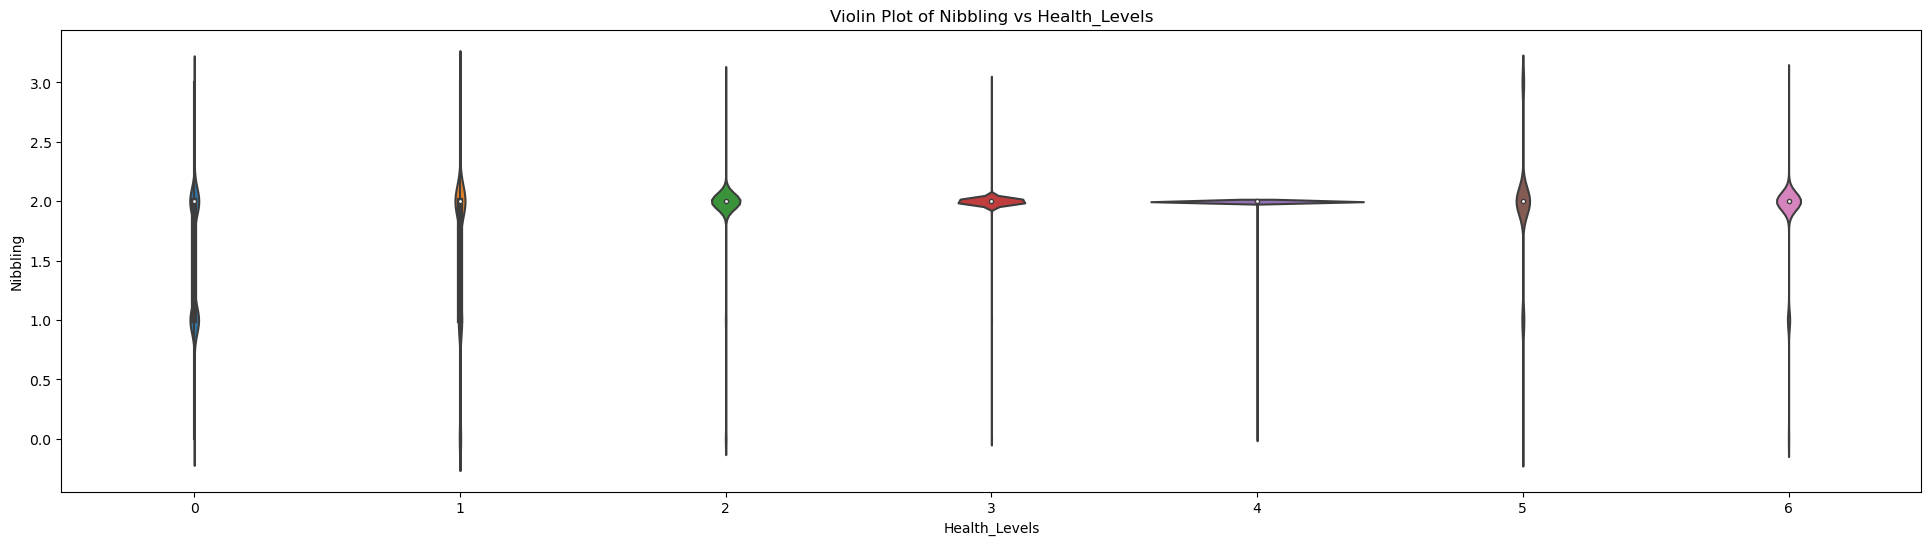

In [28]:
for feature in features:
    plt.figure(figsize=(24, 6))
    sns.violinplot(x='Health_Levels', y=feature, data=df)
    plt.title(f'Violin Plot of {feature} vs Health_Levels')
    plt.show()

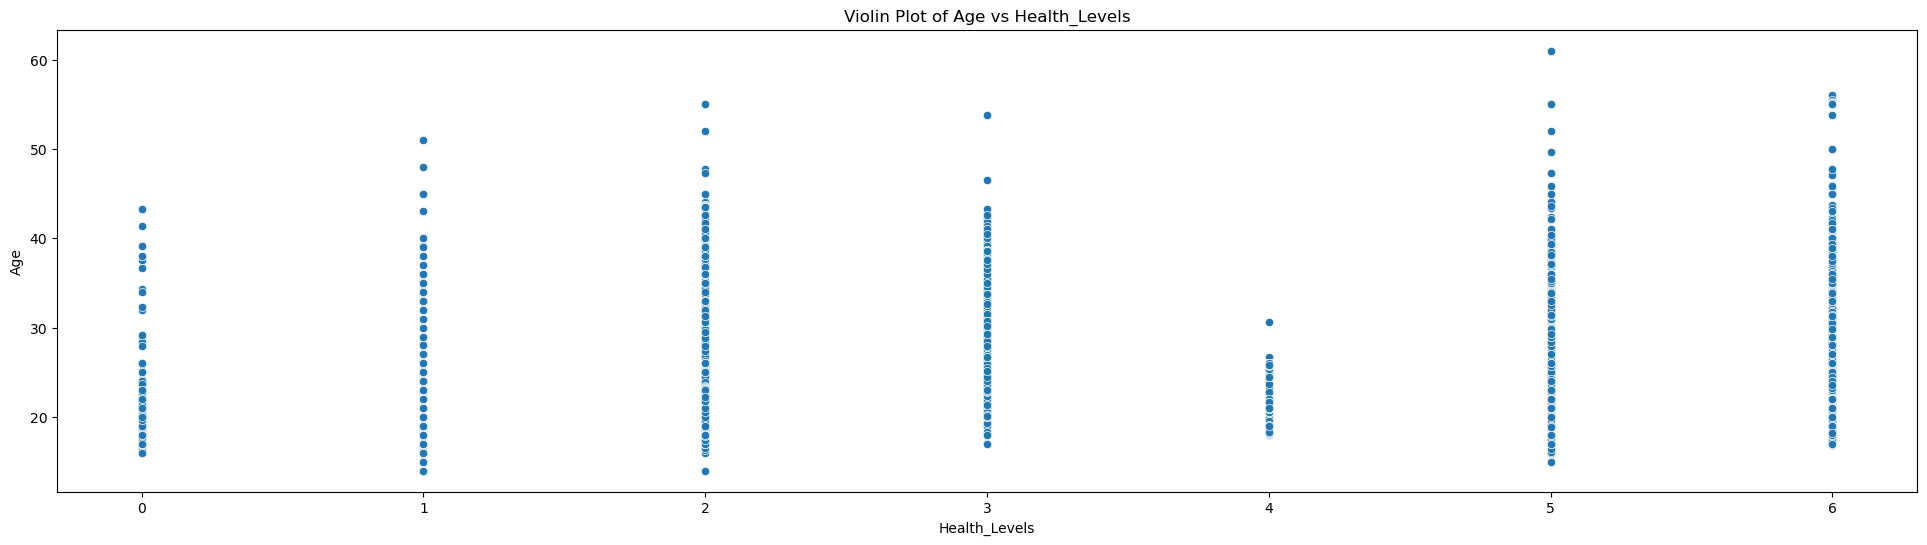

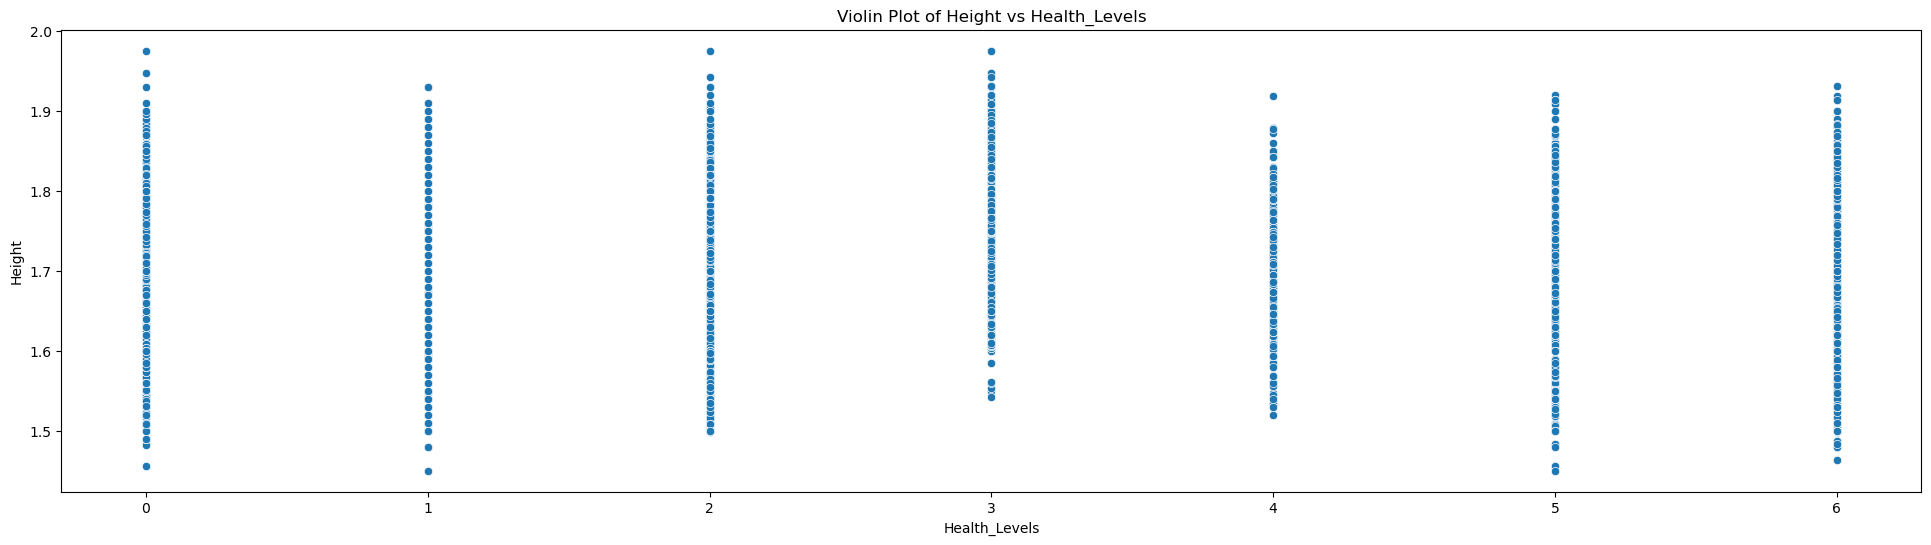

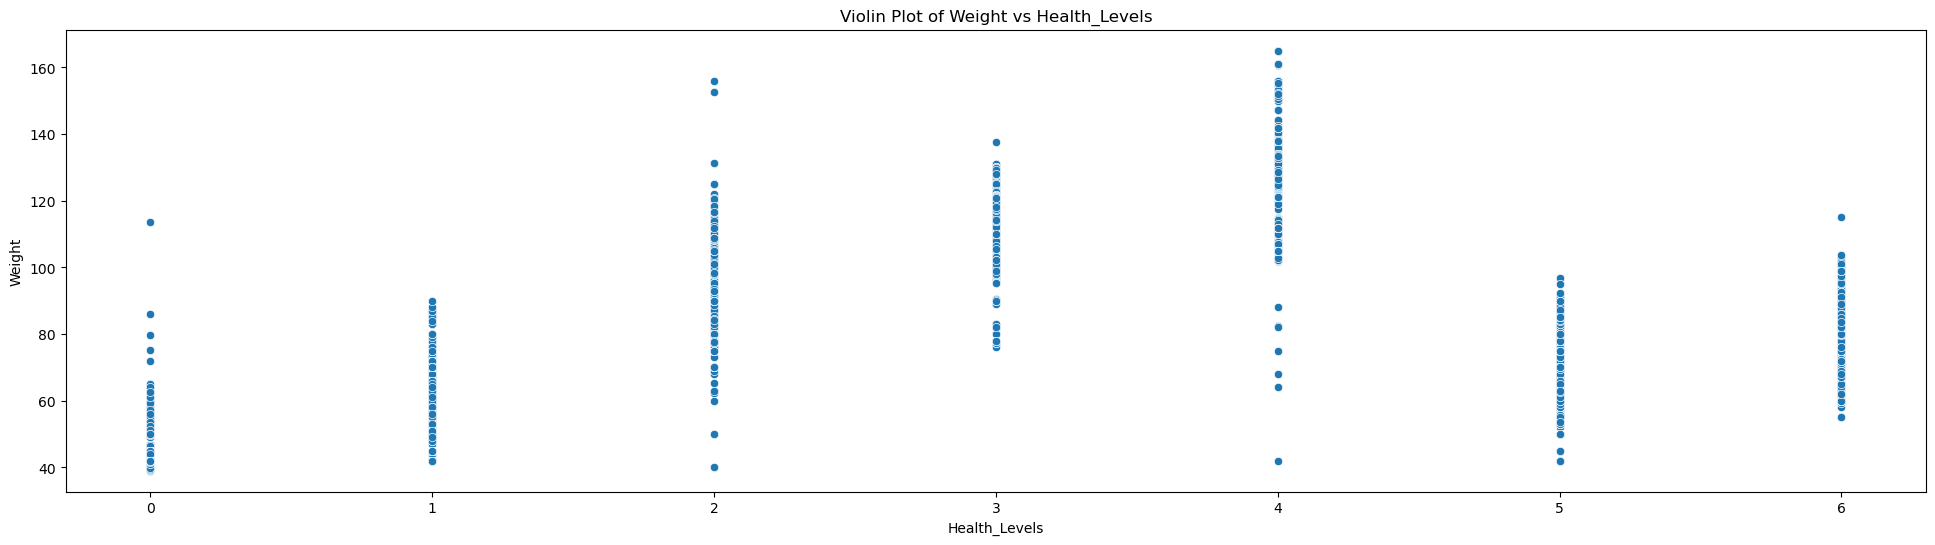

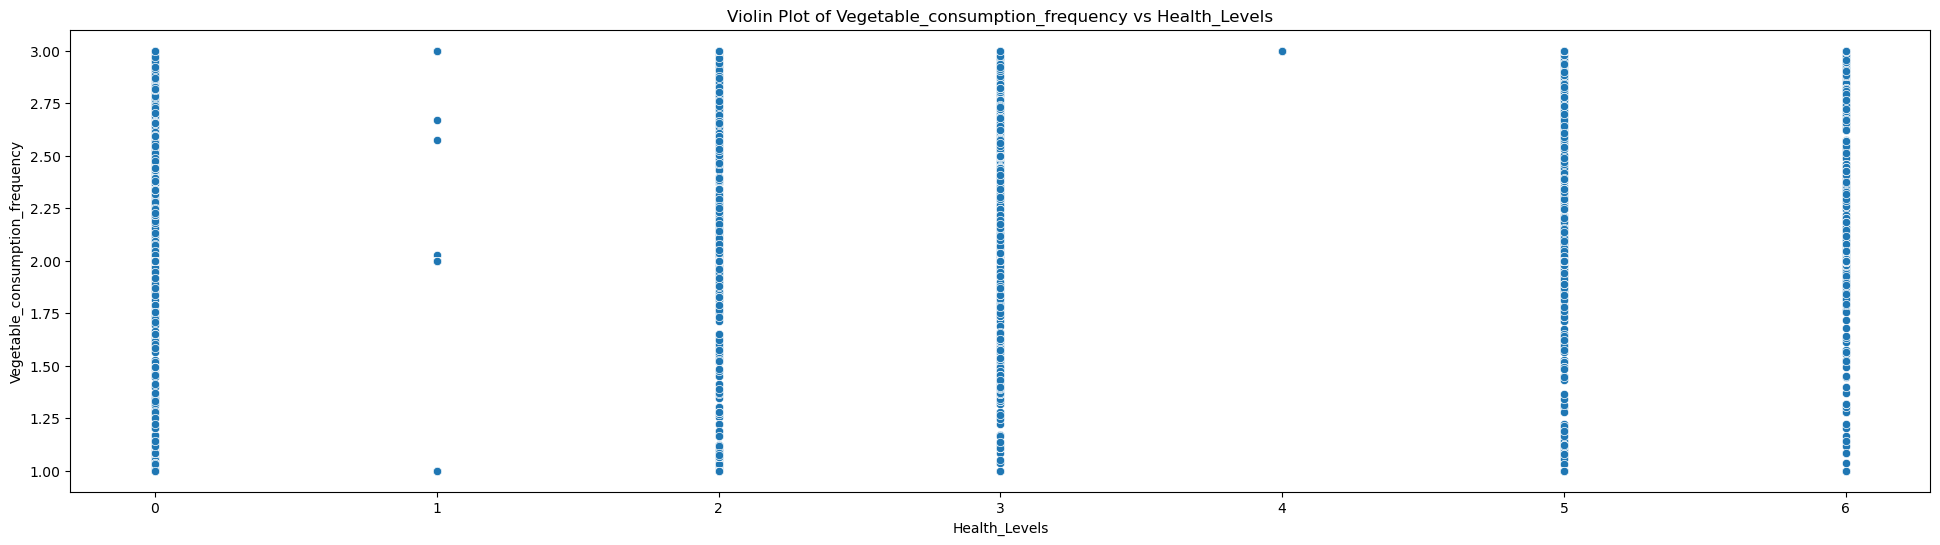

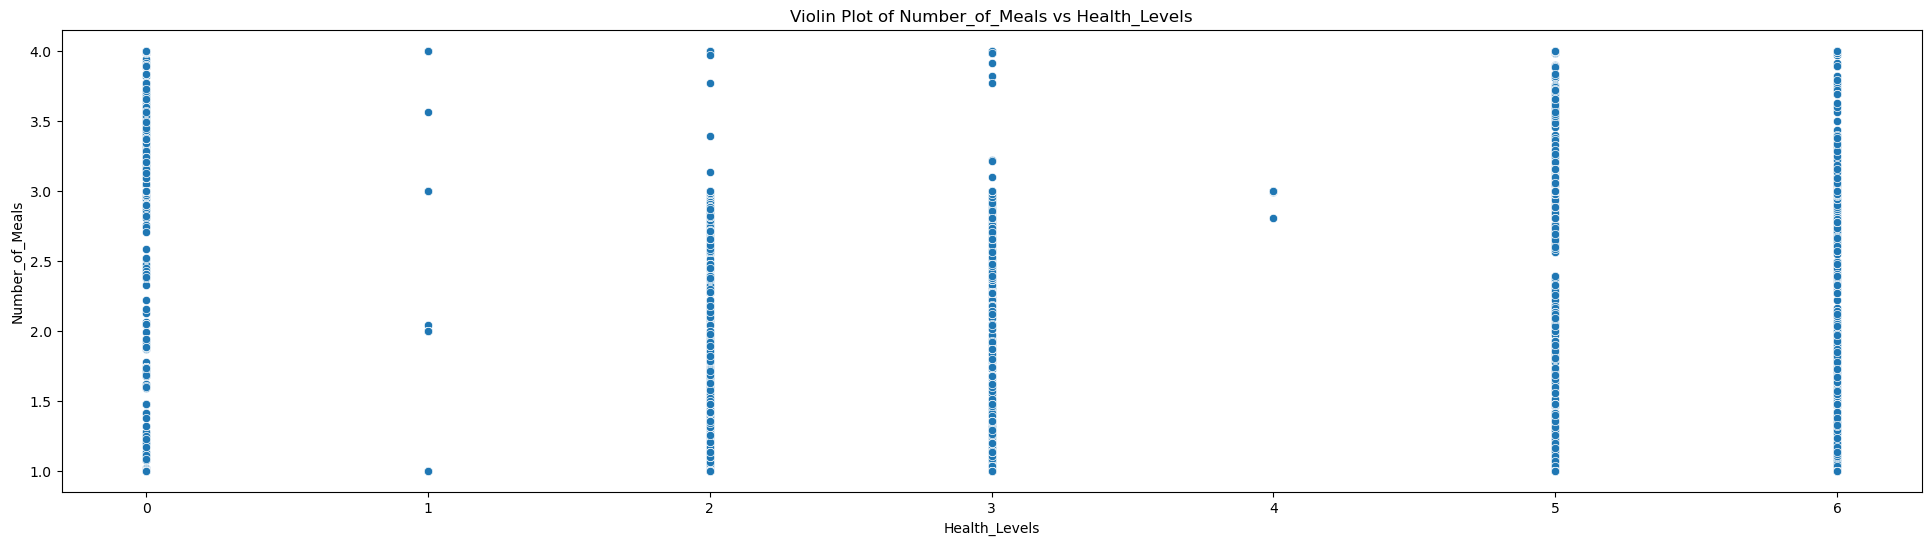

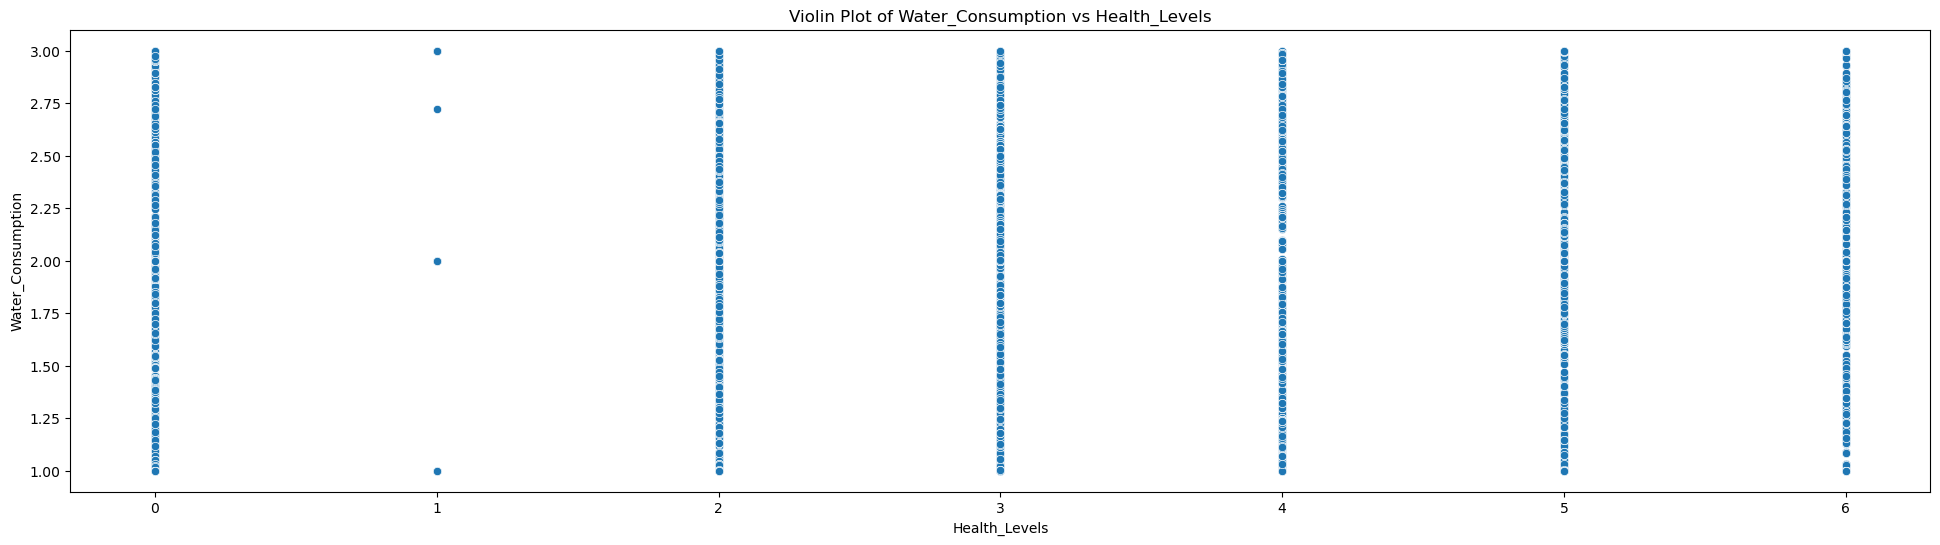

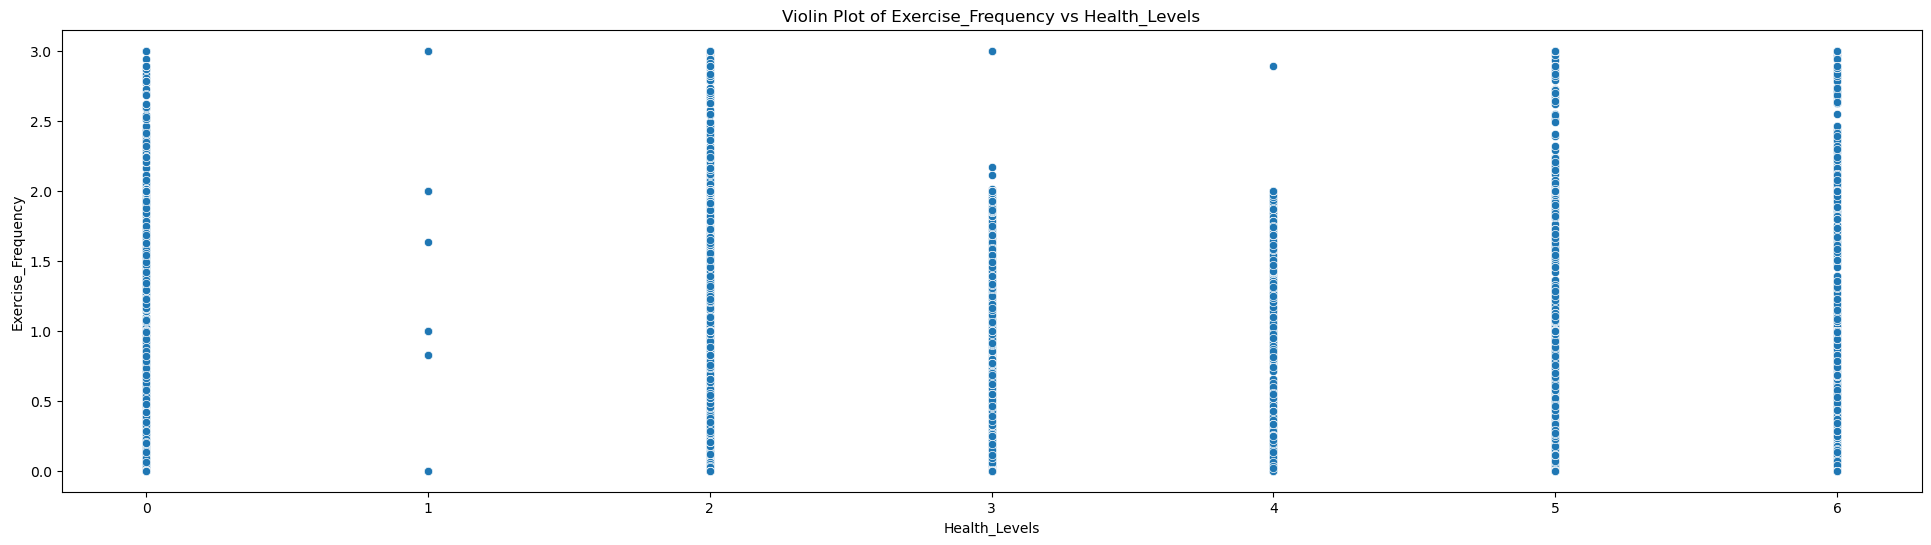

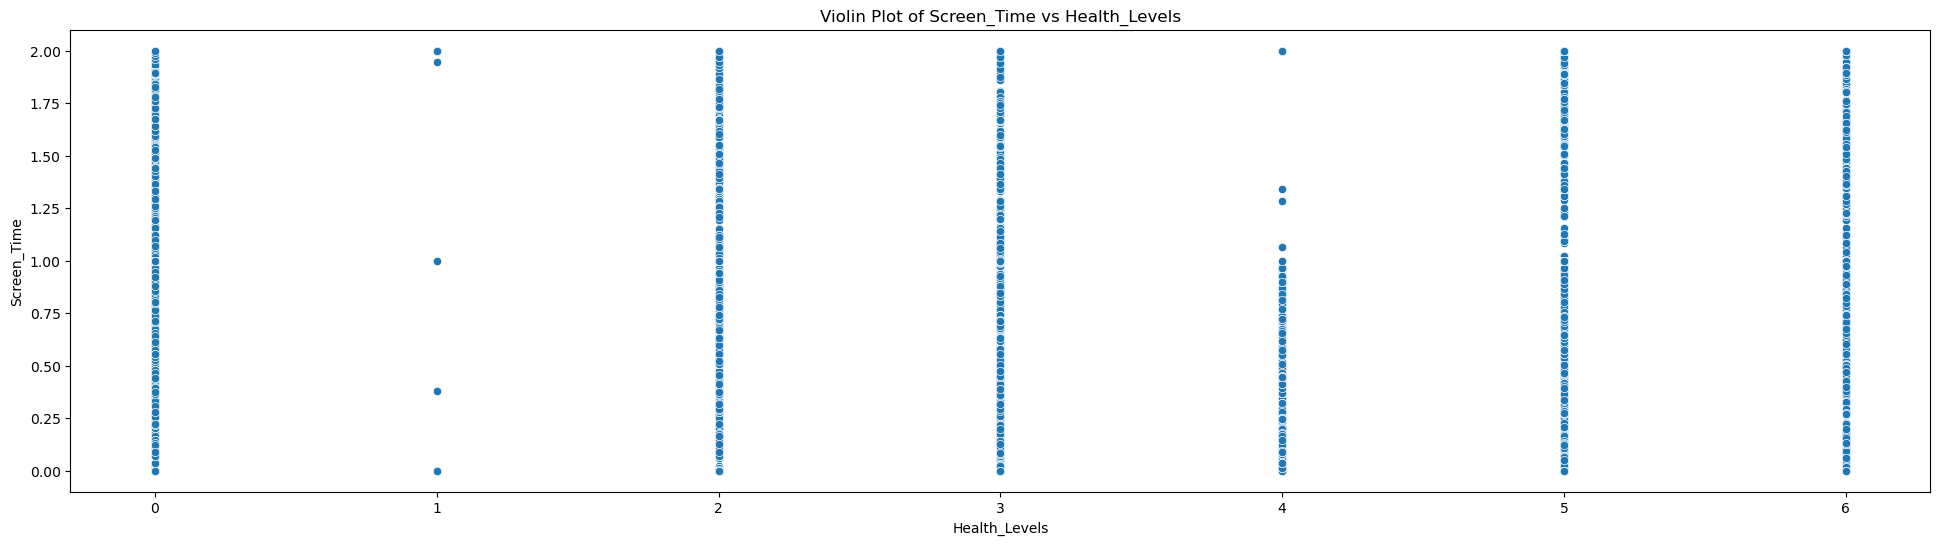

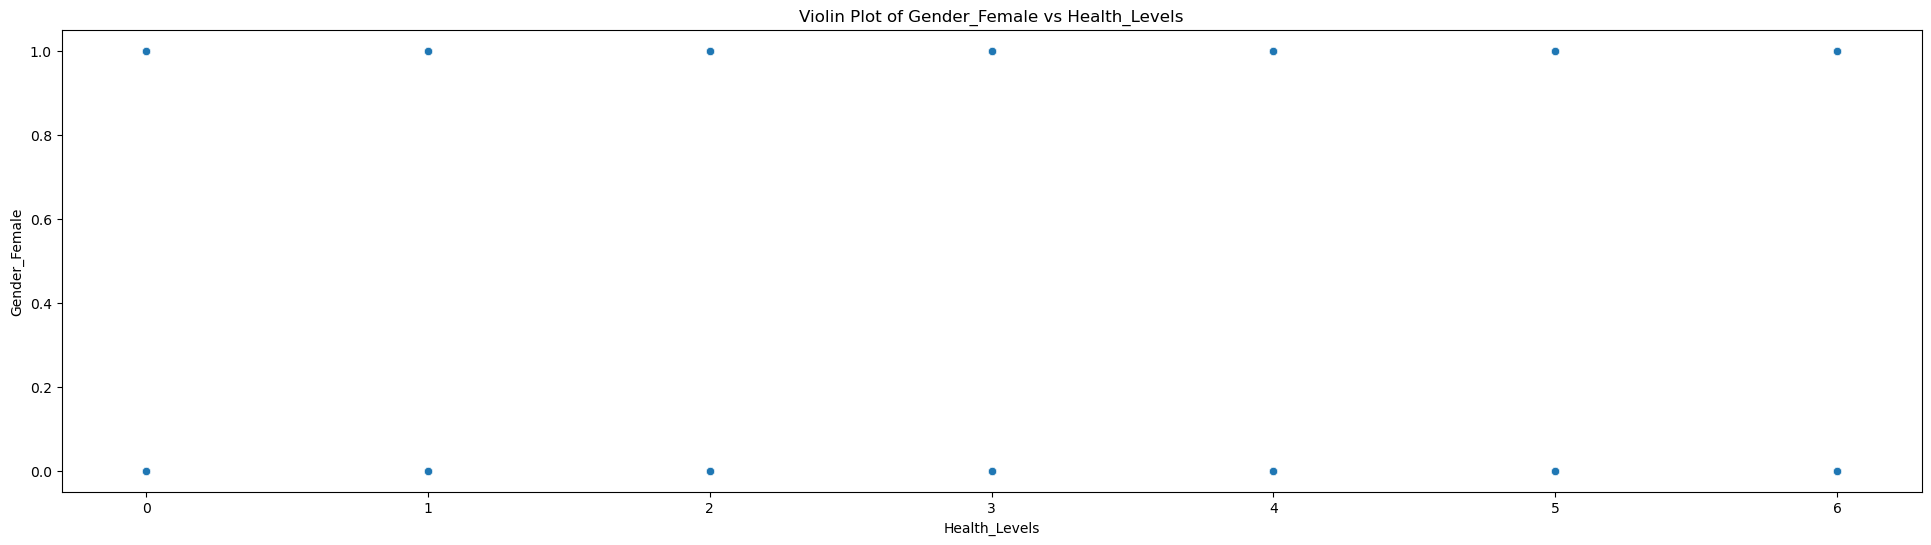

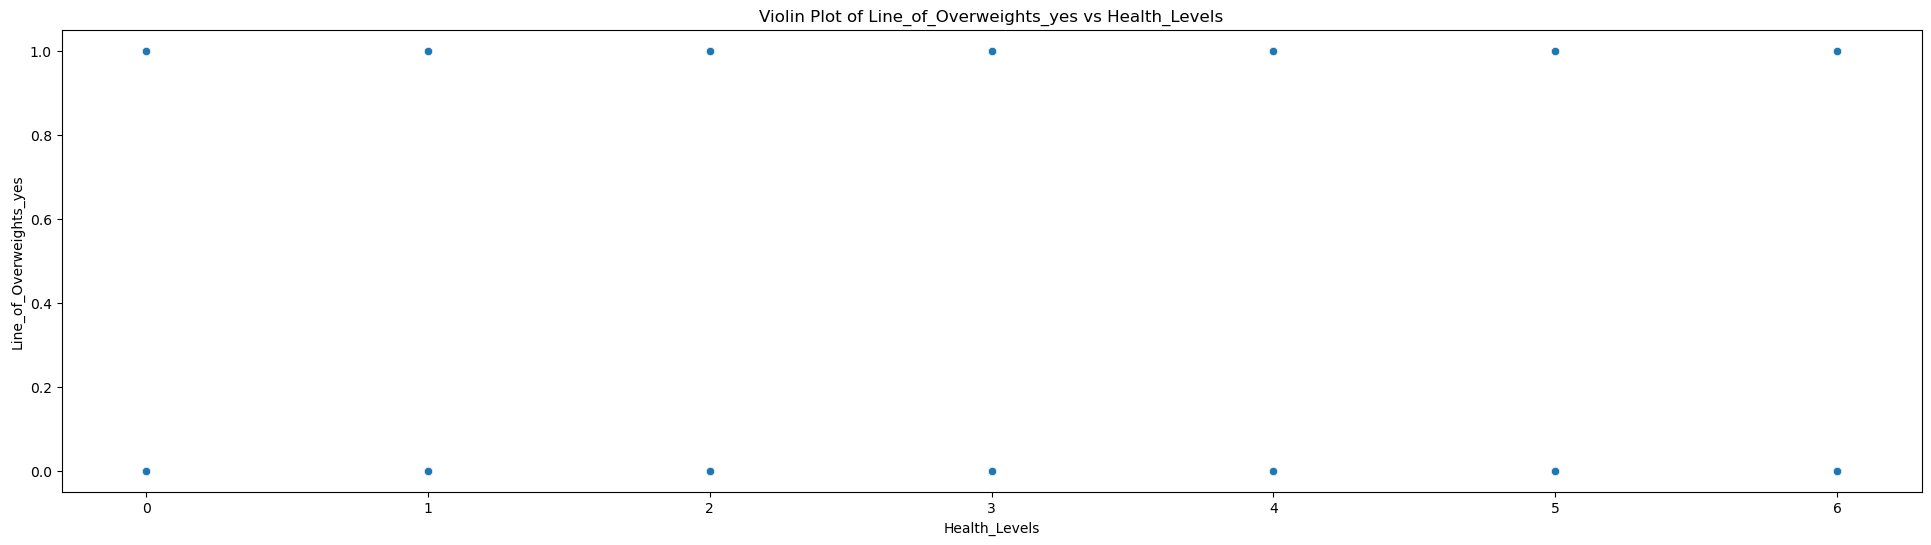

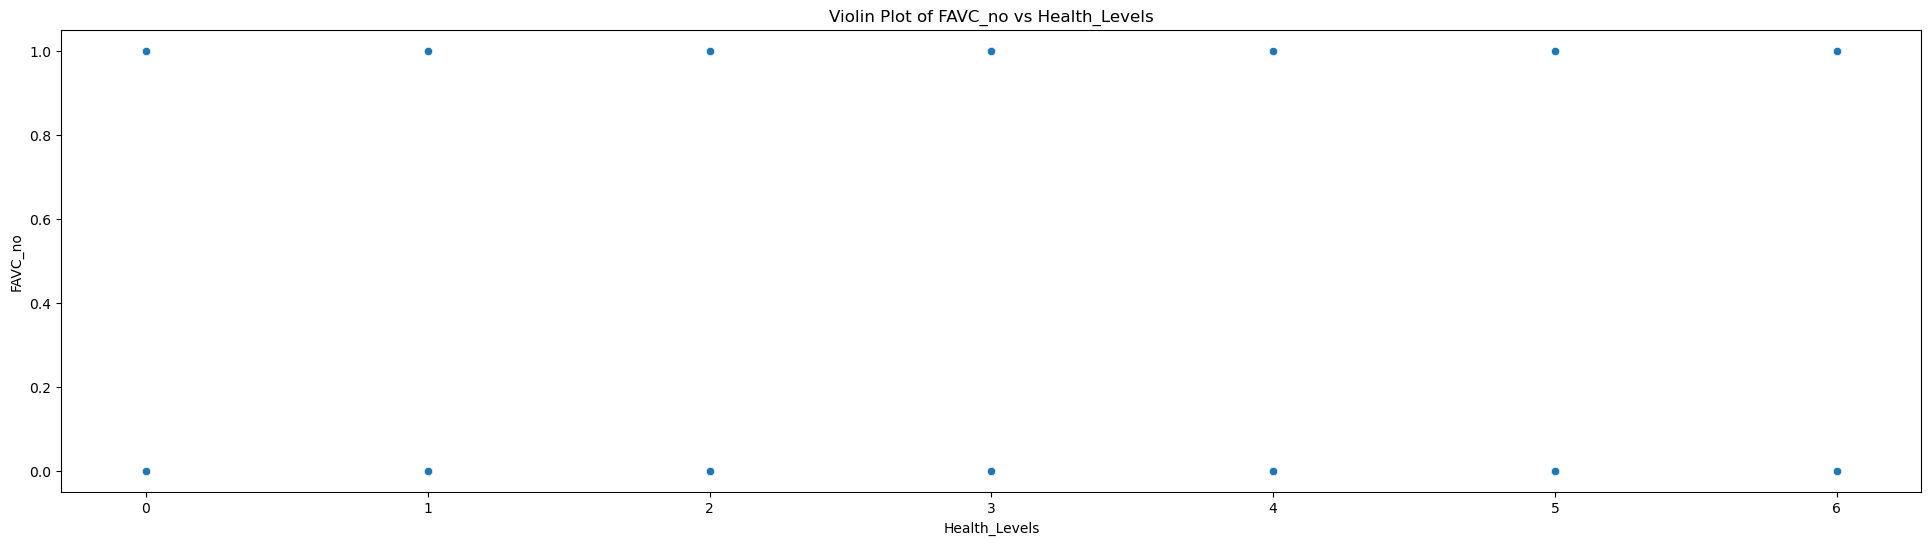

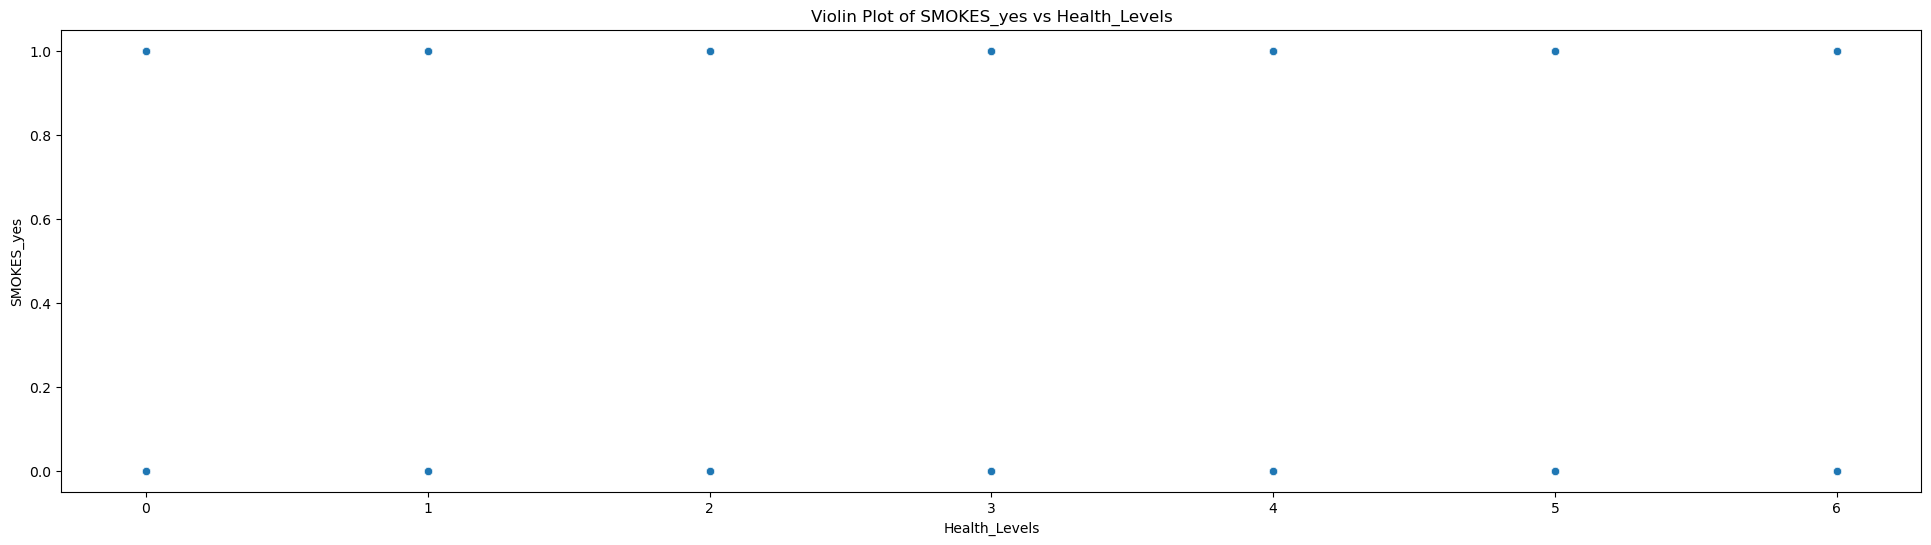

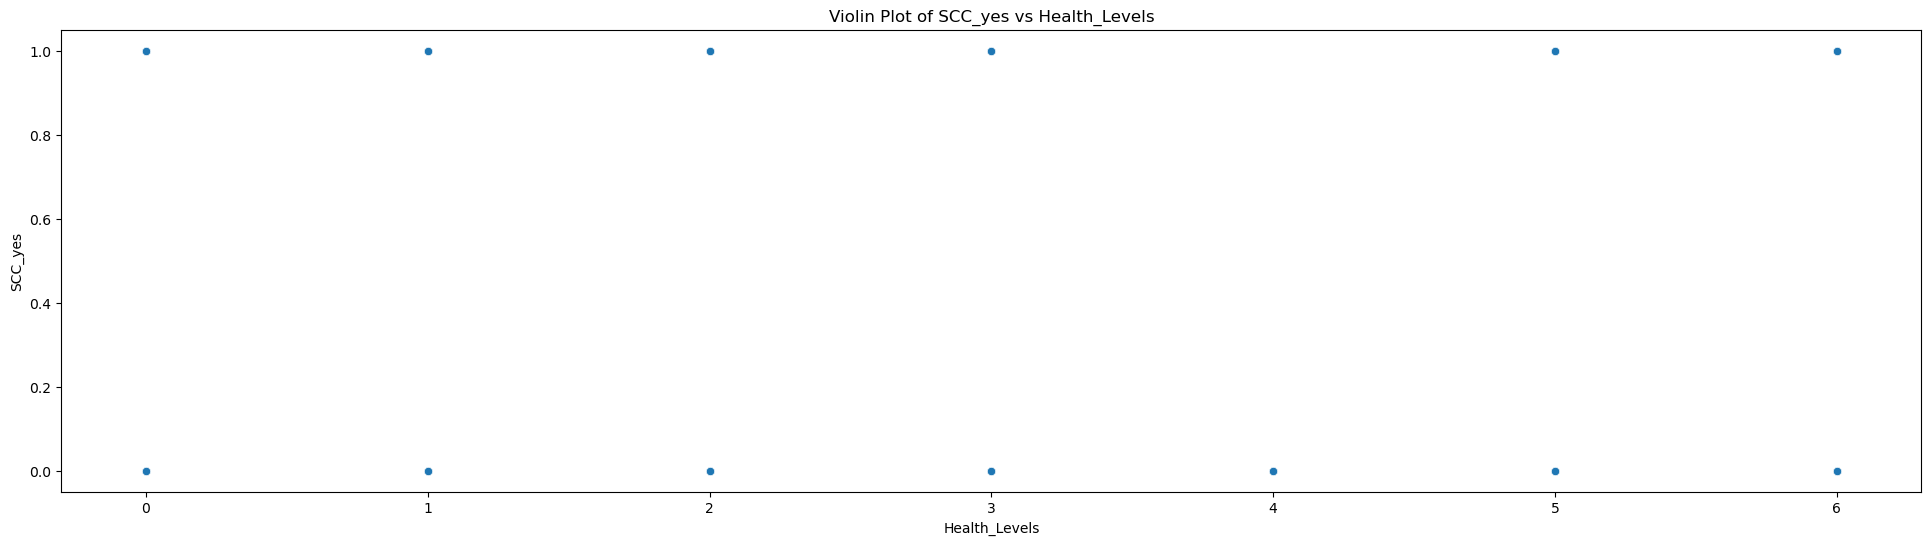

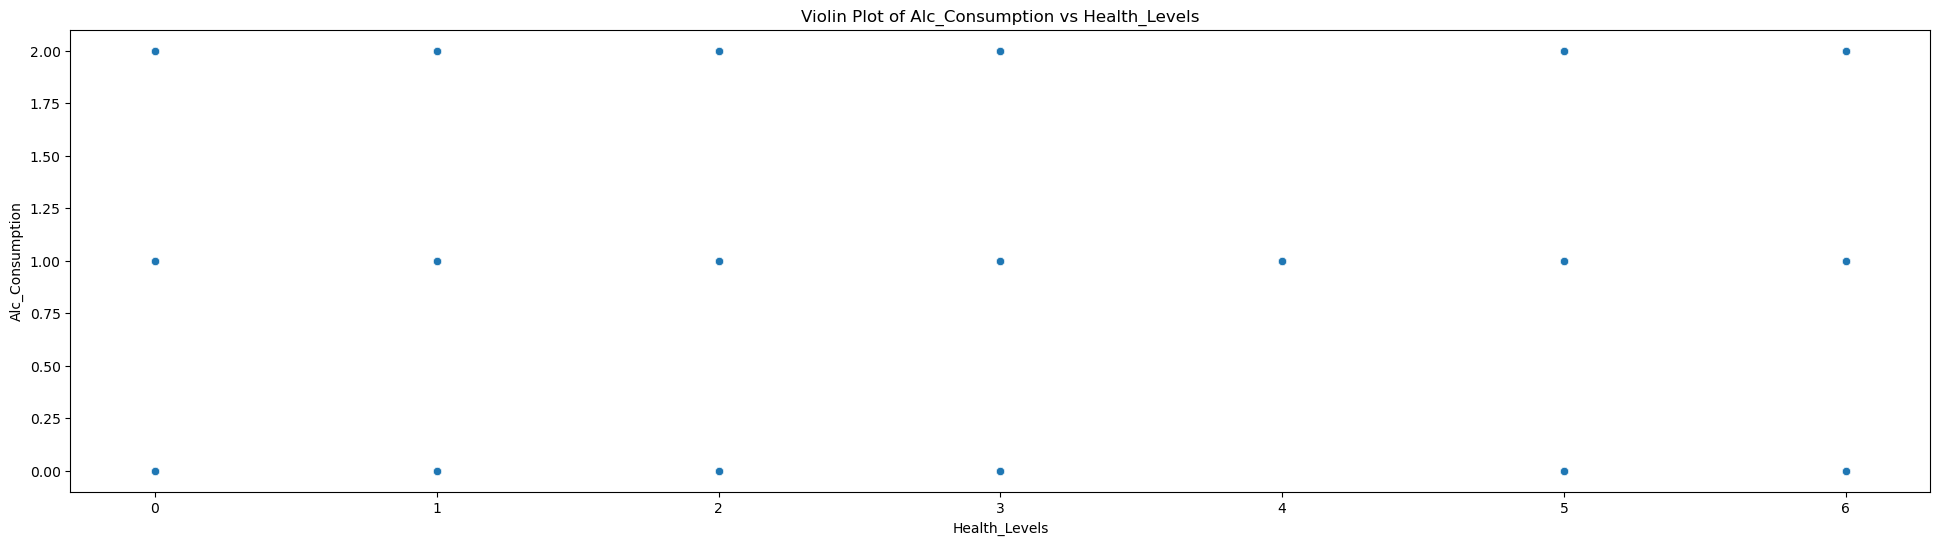

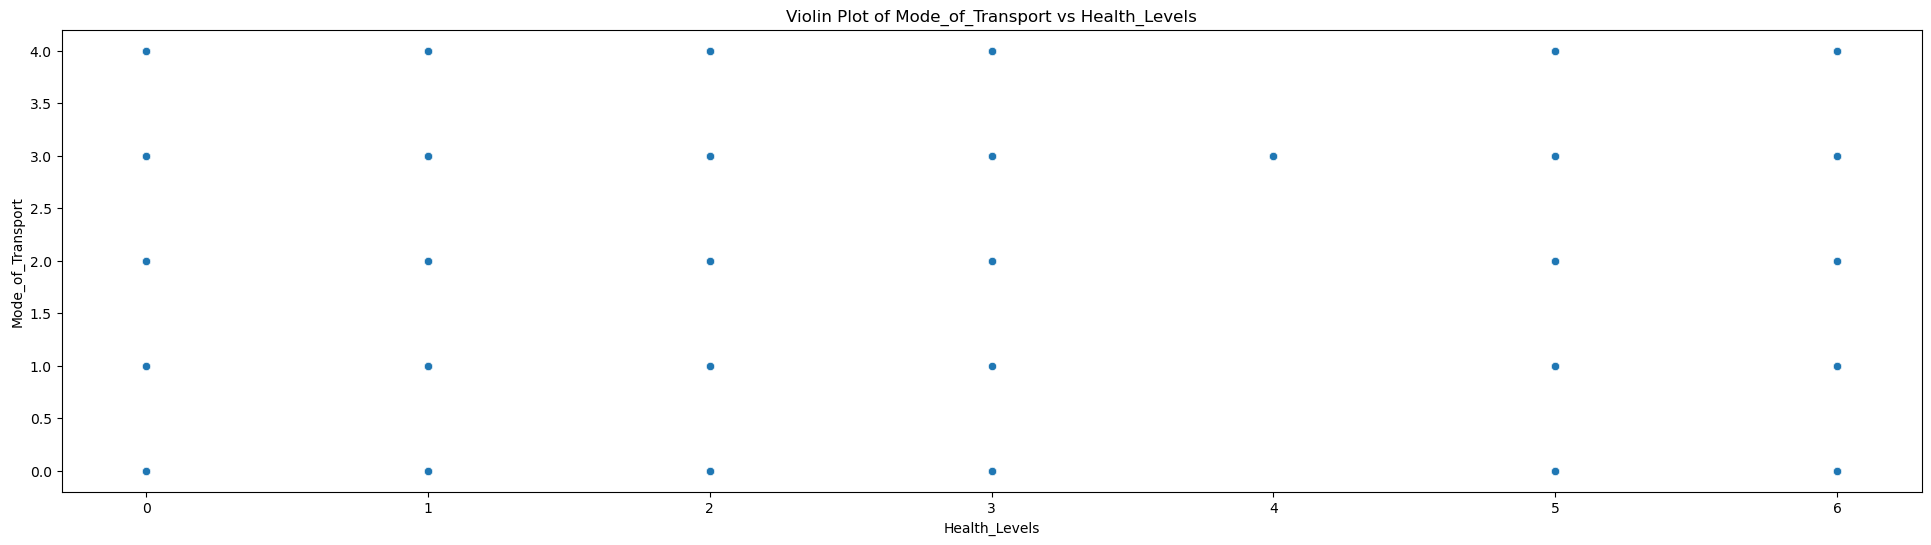

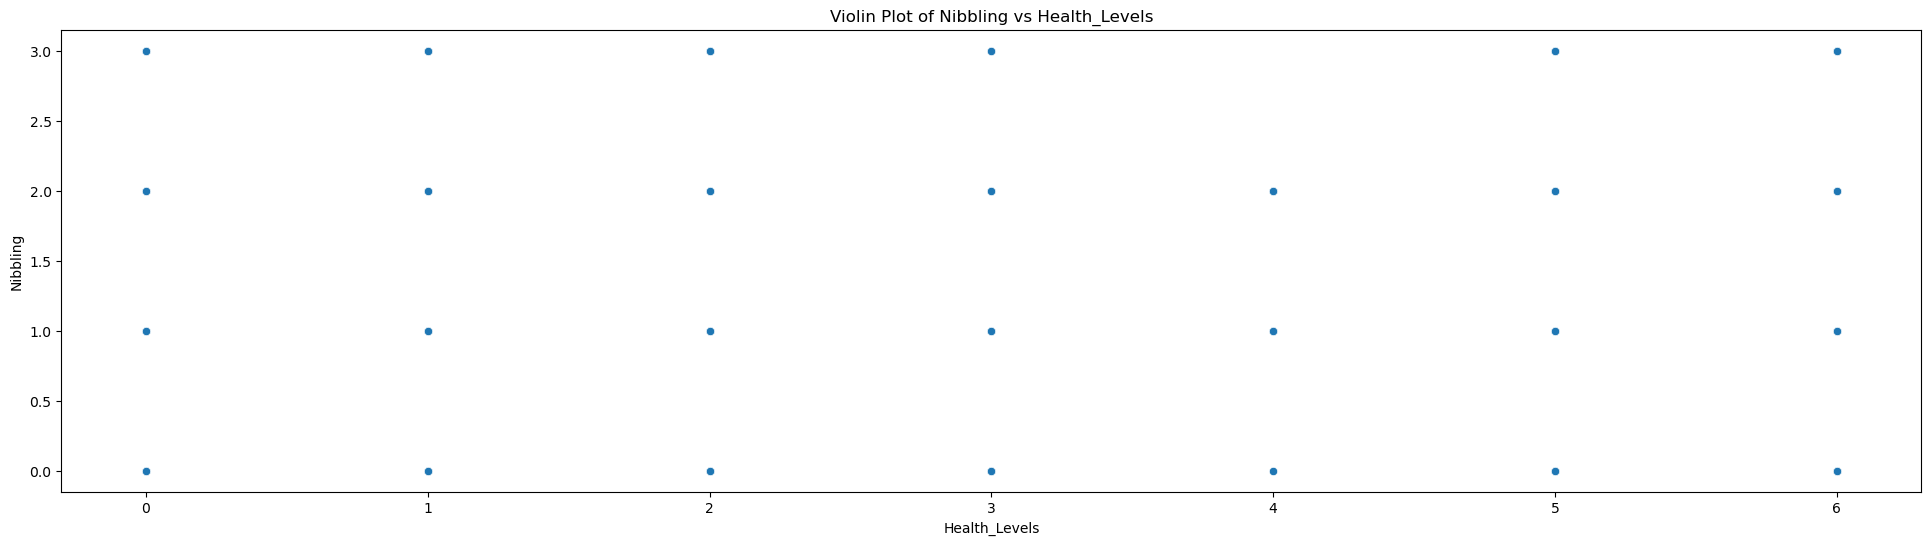

In [29]:
for feature in features:
    plt.figure(figsize=(24, 6))
    sns.scatterplot(x='Health_Levels', y=feature, data=df)
    plt.title(f'Violin Plot of {feature} vs Health_Levels')
    plt.show()

#### Normalize Some Features

In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
columns_to_normalize = ['Age', 'Height', 'Weight']
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

In [32]:
df.head()

,id,Age,Height,Weight,Vegetable_consumption_frequency,Number_of_Meals,Water_Consumption,Exercise_Frequency,Screen_Time,Gender_Female,Line_of_Overweights_yes,FAVC_no,SMOKES_yes,SCC_yes,Alc_Consumption,Mode_of_Transport,Nibbling,Health_Levels
0,0,0.222192,0.475586,0.338497,2.000000,2.983297,2.763573,0.000000,0.976473,0,1,0,0,0,1,3,2,6
1,1,0.085106,0.209260,0.142792,2.000000,3.000000,2.000000,1.000000,1.000000,1,1,0,0,0,2,0,1,1
2,2,0.085106,0.497391,0.088577,1.880534,1.411685,1.910378,0.866045,1.673584,1,1,0,0,0,2,3,2,0
3,3,0.147931,0.496002,0.732007,3.000000,3.000000,1.674061,1.467863,0.780199,1,1,0,0,0,1,3,2,4
4,4,0.375342,0.883049,0.434708,2.679664,1.971472,1.979848,1.967973,0.931721,0,1,0,0,0,1,3,2,6


In [33]:
scaler = MinMaxScaler()
columns_to_normalize = ['Vegetable_consumption_frequency', 'Water_Consumption', 'Exercise_Frequency', 'Screen_Time']
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

In [34]:
df.head(10)

,id,Age,Height,Weight,Vegetable_consumption_frequency,Number_of_Meals,Water_Consumption,Exercise_Frequency,Screen_Time,Gender_Female,Line_of_Overweights_yes,FAVC_no,SMOKES_yes,SCC_yes,Alc_Consumption,Mode_of_Transport,Nibbling,Health_Levels
0,0,0.222192,0.475586,0.338497,0.500000,2.983297,0.881787,0.000000,0.488237,0,1,0,0,0,1,3,2,6
1,1,0.085106,0.209260,0.142792,0.500000,3.000000,0.500000,0.333333,0.500000,1,1,0,0,0,2,0,1,1
2,2,0.085106,0.497391,0.088577,0.440267,1.411685,0.455189,0.288682,0.836792,1,1,0,0,0,2,3,2,0
3,3,0.147931,0.496002,0.732007,1.000000,3.000000,0.337031,0.489288,0.390099,1,1,0,0,0,1,3,2,4
4,4,0.375342,0.883049,0.434708,0.839832,1.971472,0.489924,0.655991,0.465861,0,1,0,0,0,1,3,2,6
5,5,0.087835,0.567900,0.099579,0.959876,3.000000,0.568775,0.643344,0.500000,0,1,0,0,0,1,3,2,0
6,6,0.337937,0.579670,0.584853,0.495620,3.000000,0.500000,0.000000,0.348474,0,1,0,0,0,1,0,2,3
7,7,0.338116,0.570993,0.628338,0.198734,3.000000,0.500000,0.199552,0.000000,0,1,0,0,0,1,0,2,3
8,8,0.063830,0.475590,0.245920,0.500000,3.000000,1.000000,0.333333,0.500000,0,0,0,0,1,2,3,2,5
9,9,0.255319,0.359234,0.573356,1.000000,3.000000,0.816126,0.000000,0.109323,1,1,0,0,0,1,3,2,4


### Train Models

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [37]:
X = df.drop(columns = ['Health_Levels', 'id'])
y = df['Health_Levels'] 

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
models = {
    'Random Forest': make_pipeline(StandardScaler(), RandomForestClassifier()),
    'SVM': make_pipeline(StandardScaler(), SVC()),
    'Logistic Regression': make_pipeline(StandardScaler(), LogisticRegression()),
    'KNN': make_pipeline(StandardScaler(), KNeighborsClassifier()),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [40]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    if model_name in ['Random Forest', 'SVM', 'Logistic Regression', 'KNN']:
        y_pred = model.predict(X_test)
    else:
        y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy:", accuracy)

Random Forest Accuracy: 0.8945086705202312
SVM Accuracy: 0.8634393063583815


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.8636801541425819
KNN Accuracy: 0.7377167630057804
Naive Bayes Accuracy: 0.6630539499036608
Decision Tree Accuracy: 0.8446531791907514
Gradient Boosting Accuracy: 0.9026974951830443


### Select Best Model

In [42]:
best_model = GradientBoostingClassifier()

### Take Output

In [44]:
df_test = pd.read_csv('output.csv')

In [45]:
best_model.fit(X, y)

GradientBoostingClassifier()

In [46]:
df_test_ = df_test.drop(columns = ['id'])

In [47]:
predictions = best_model.predict(df_test_)

In [48]:
predictions

array([3, 5, 4, ..., 0, 1, 3])

In [49]:
# output = pd.DataFrame({'id': df_test.id,
#                        'NObeyesdad': predictions})
# output.to_csv('submission.csv', index=False)

### Convert the numbers to original Strings Again

In [51]:
df['Health_Levels'].unique()

array([6, 1, 0, 4, 3, 5, 2])

In [52]:
mapping = {0: 'Insufficient_Weight', 1: 'Normal_Weight', 2: 'Obesity_Type_I', 3: 'Obesity_Type_II', 4: 'Obesity_Type_III', 5: 'Overweight_Level_I', 6: 'Overweight_Level_II'}

In [53]:
# output['NObeyesdad'] = output['NObeyesdad'].map(mapping)

In [54]:
# output.to_csv('submission.csv', index=False)

### Predicting Output Using Streamlit

In [56]:
import warnings
warnings.filterwarnings('ignore')

In [57]:
input_data = (0.274466,0.751498,0.647675,0.969308,3.000000,0.912815,0.285133,0.000000,0,1,0,0,0,2,3,2)
input_data_as_np_array = np.asarray(input_data)
input_data_reshaped = input_data_as_np_array.reshape(1,-1)
prediction = best_model.predict(input_data_reshaped)

if prediction.item() in mapping:
    bmi_category = mapping[prediction.item()]
    print('The Person is:', bmi_category)

The Person is: Obesity_Type_II


### Save The Model

In [59]:
import pickle

In [61]:
filename = 'trained_model.sav'
pickle.dump(best_model, open(filename, 'wb'))

In [65]:
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [ ]:
input_data = (0.274466,0.751498,0.647675,0.969308,3.000000,0.912815,0.285133,0.000000,0,1,0,0,0,2,3,2)
input_data_as_np_array = np.asarray(input_data)
input_data_reshaped = input_data_as_np_array.reshape(1,-1)
prediction = loaded_model.predict(input_data_reshaped)

if prediction.item() in mapping:
    bmi_category = mapping[prediction.item()]
    print('The Person is:', bmi_category)